In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/anupama_jaiswal/Downloads/Kaggle_Dataset/Indicators.csv')

In [3]:
df.head()

CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06

In [4]:
df['CountryName'].unique().tolist()

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income: nonOECD',
 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)',
 'Upper middle income',
 'Wor

In [5]:
df.shape

(5656458, 6)

In [6]:
CC = df['CountryCode'].unique().tolist()
len(CC)

247

In [7]:
d = {}

for i in CC:

    d["{0}".format(i)] = df[df['CountryCode'].isin([i])]
    d["{0}".format(i)] = d["{0}".format(i)].set_index('Year')
    

In [8]:
d['IND']

CountryName CountryCode  \
Year                           
1960       India         IND   
1960       India         IND   
1960       India         IND   
1960       India         IND   
1960       India         IND   
...          ...         ...   
2015       India         IND   
2015       India         IND   
2015       India         IND   
2015       India         IND   
2015       India         IND   

                                          IndicatorName      IndicatorCode  \
Year                                                                         
1960  Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
1960  Age dependency ratio (% of working-age populat...        SP.POP.DPND   
1960  Age dependency ratio, old (% of working-age po...     SP.POP.DPND.OL   
1960  Age dependency ratio, young (% of working-age ...     SP.POP.DPND.YG   
1960                Agriculture, value added (% of GDP)     NV.AGR.TOTL.ZS   
...                                                 ...                ...   
2015          Time required to register property (days)        IC.PRP.DURS   
2015           Time required to start a business (days)        IC.REG.DURS   
2015              Time to prepare and pay taxes (hours)        IC.TAX.DURS   
2015                 Time to resolve insolvency (years)        IC.ISV.DURS   
2015           Total tax rate (% of commercial profits)  IC.TAX.TOTL.CP.ZS   

           Value  
Year              
1960  103.938000  
1960   76.559538  
1960    5.403730  
1960   71.155808  
1960   42.561131  
...          ...  
2015   47.000000  
2015   29.000000  
2015  243.000000  
2015    4.300000  
2015   60.600000  

[35721 rows x 5 columns]

In [9]:
d["{0}".format(i)]['IndicatorName']

Year
1960    Adolescent fertility rate (births per 1,000 wo...
1960    Age dependency ratio (% of working-age populat...
1960    Age dependency ratio, old (% of working-age po...
1960    Age dependency ratio, young (% of working-age ...
1960          Arms imports (SIPRI trend indicator values)
                              ...                        
2015            Time required to register property (days)
2015             Time required to start a business (days)
2015                Time to prepare and pay taxes (hours)
2015                   Time to resolve insolvency (years)
2015             Total tax rate (% of commercial profits)
Name: IndicatorName, Length: 29310, dtype: object

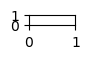

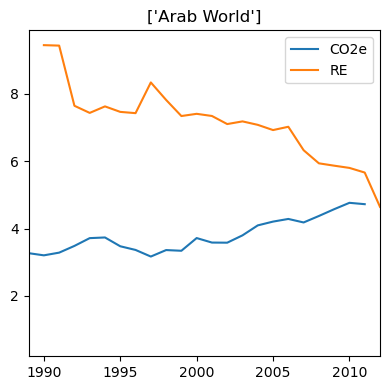

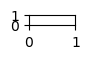

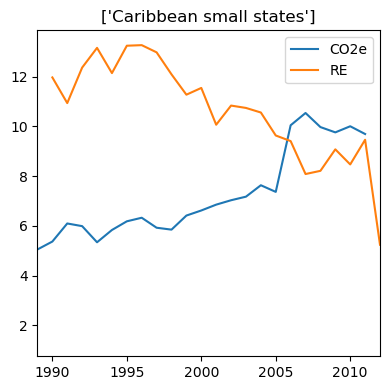

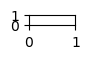

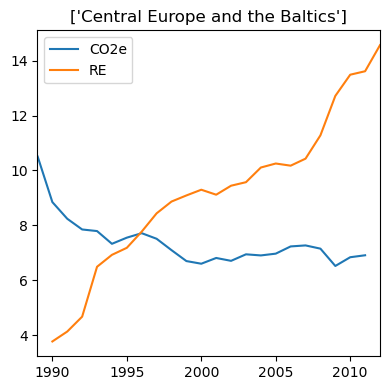

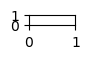

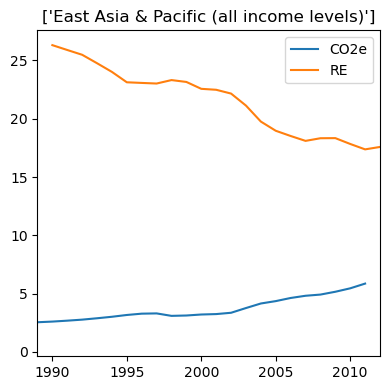

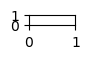

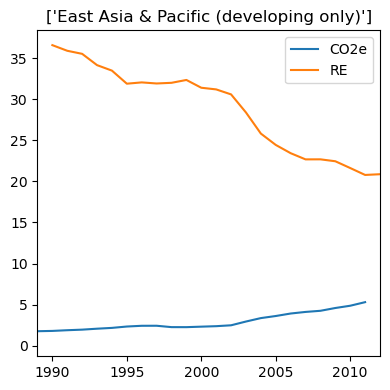

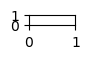

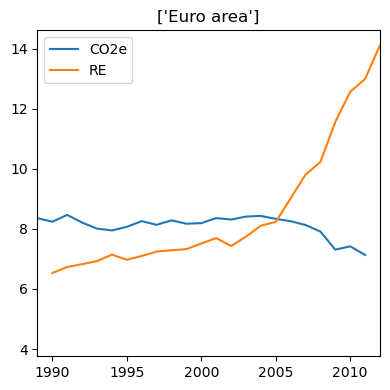

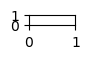

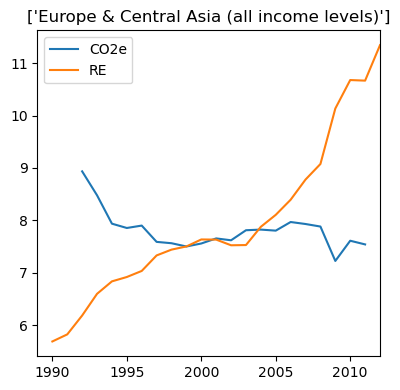

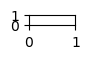

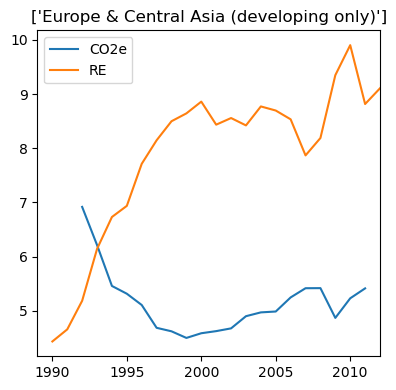

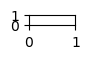

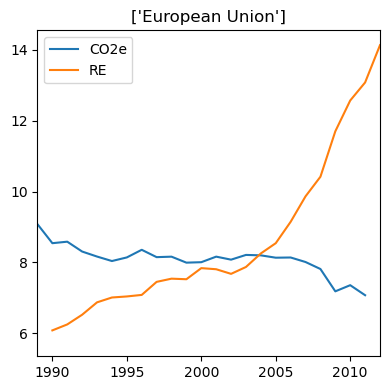

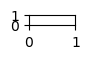

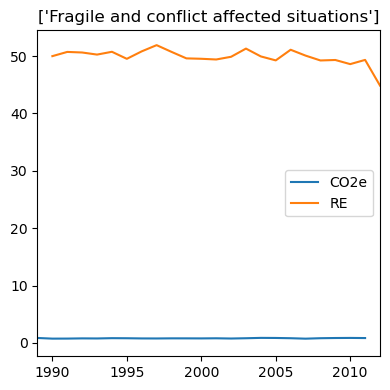

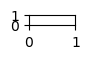

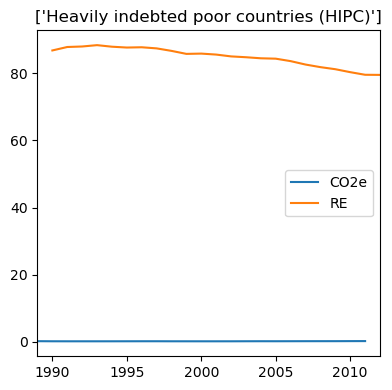

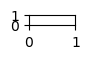

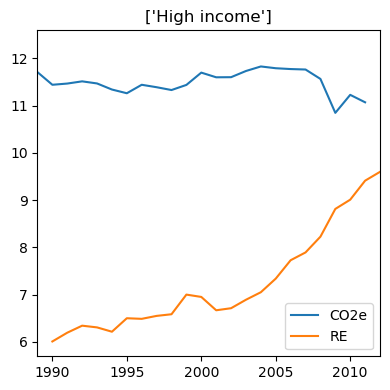

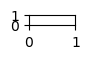

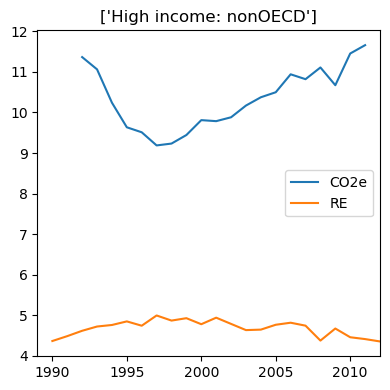

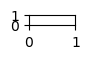

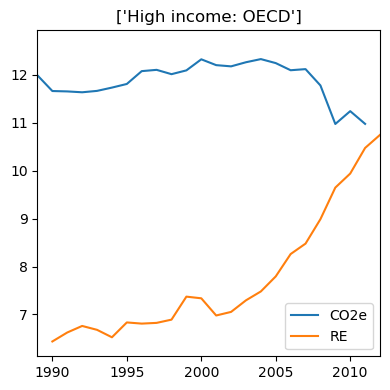

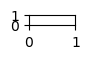

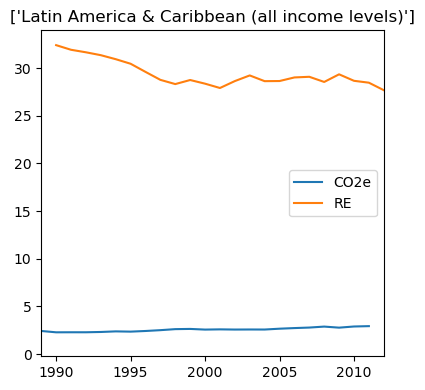

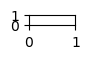

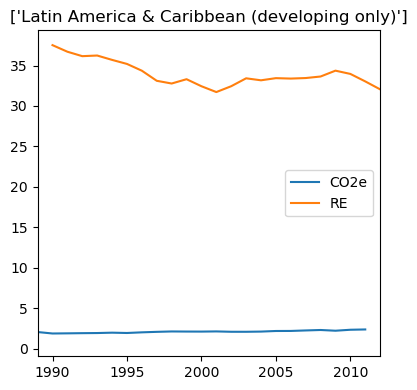

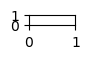

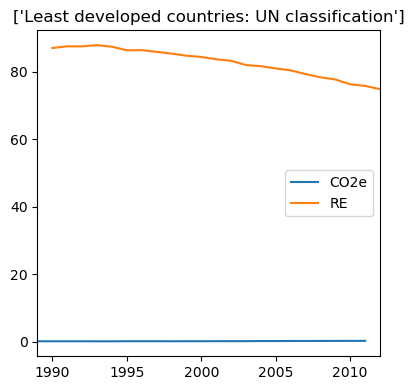

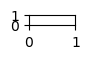

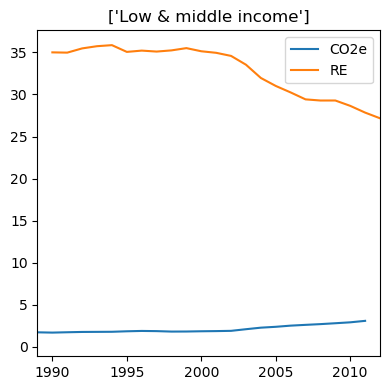

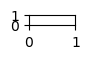

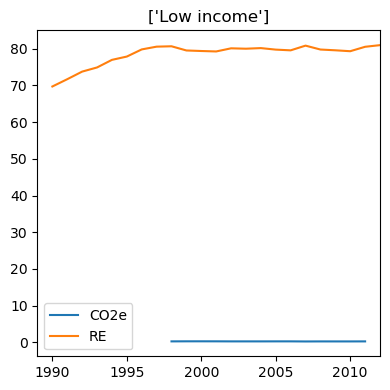

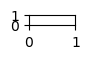

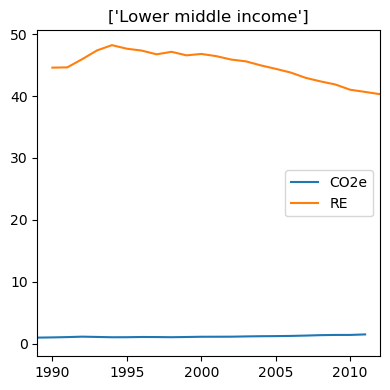

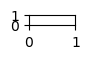

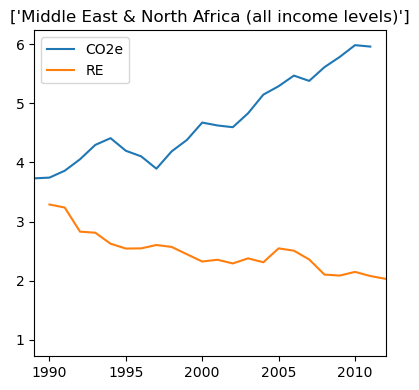

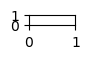

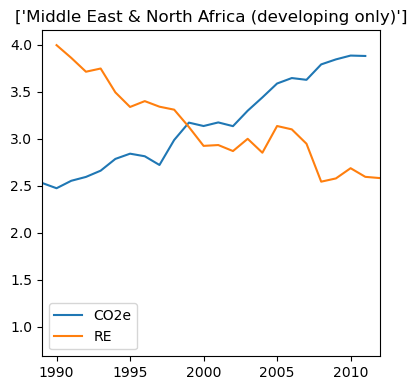

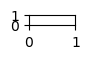

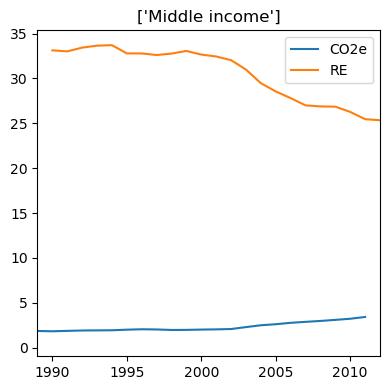

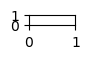

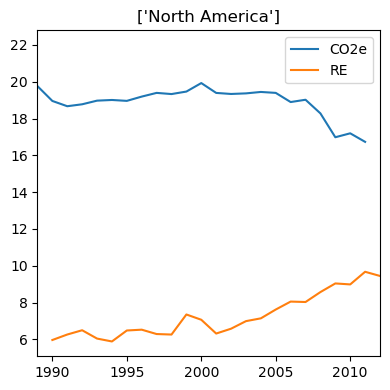

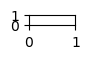

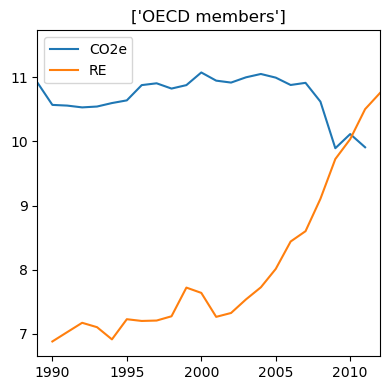

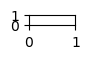

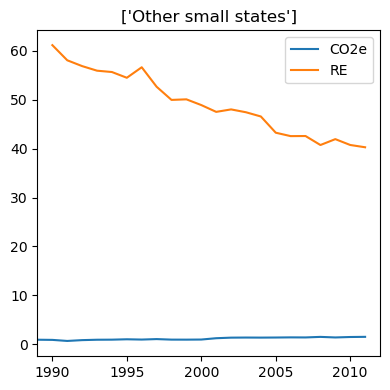

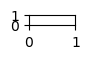

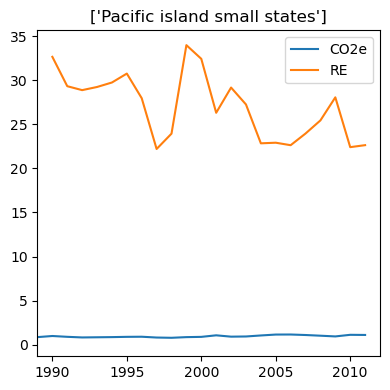

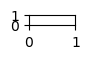

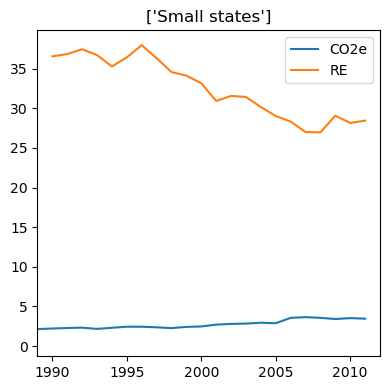

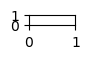

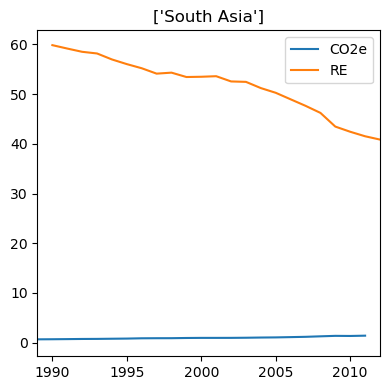

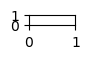

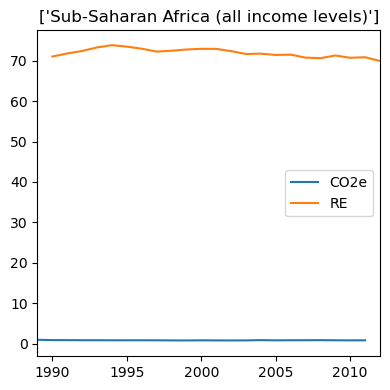

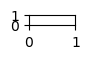

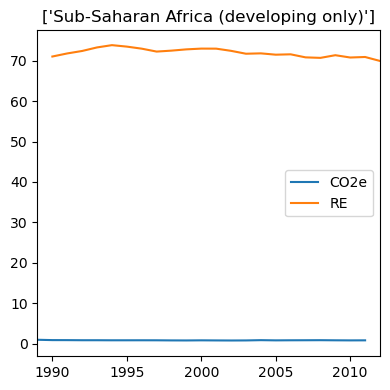

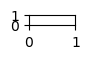

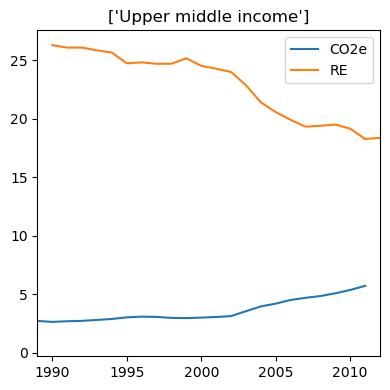

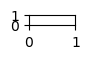

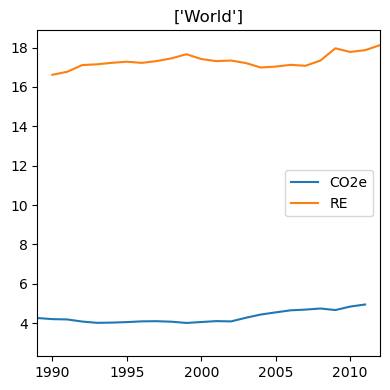

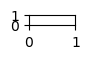

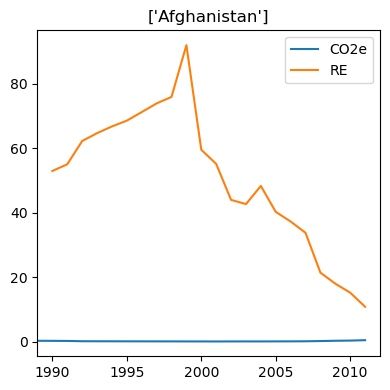

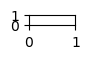

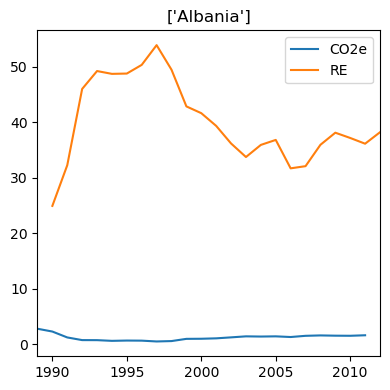

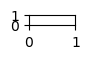

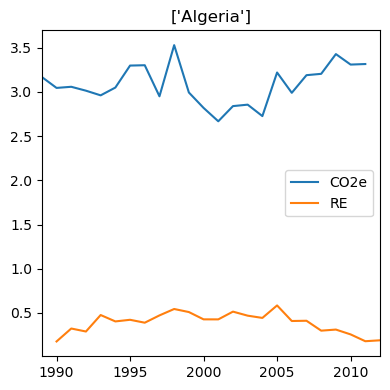

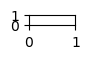

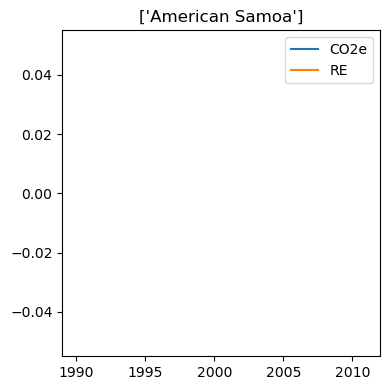

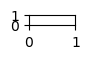

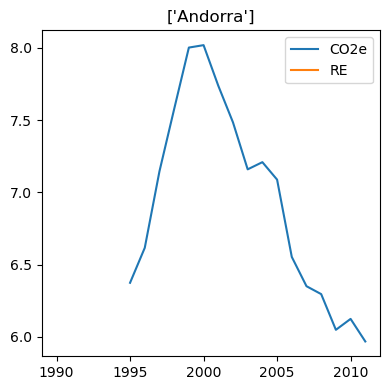

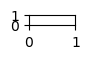

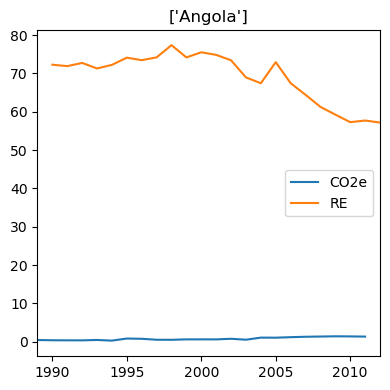

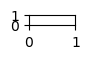

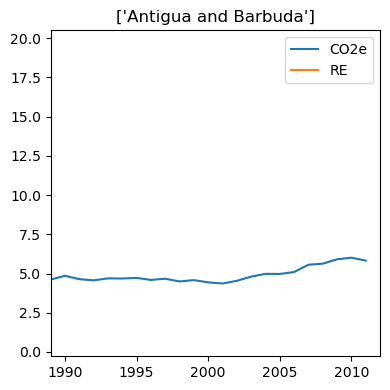

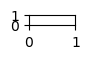

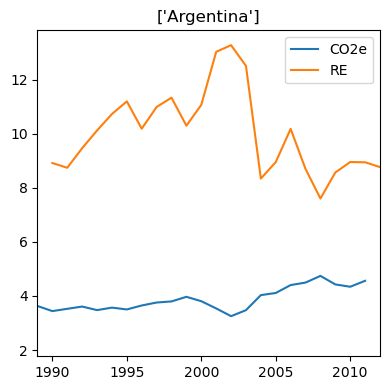

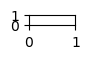

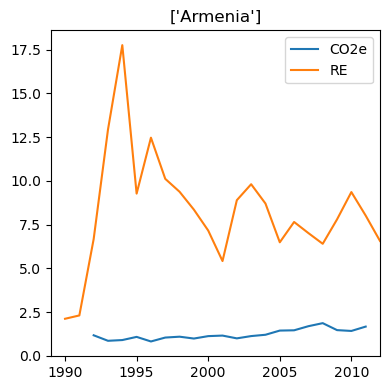

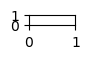

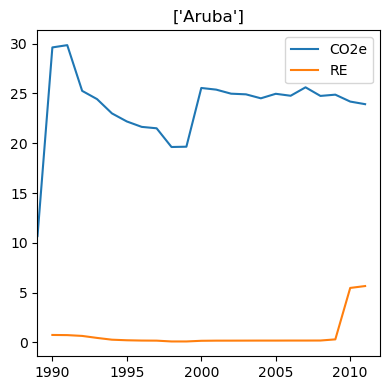

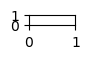

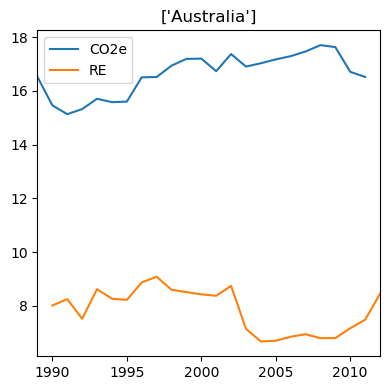

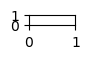

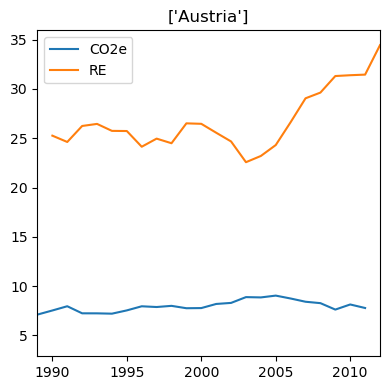

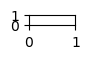

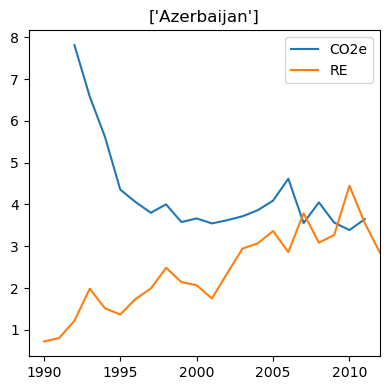

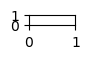

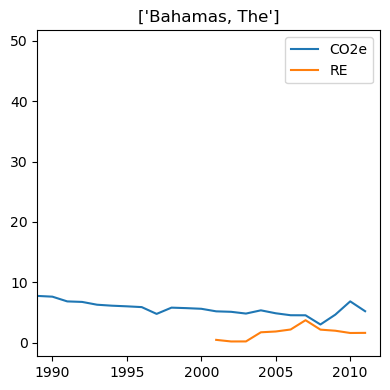

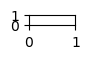

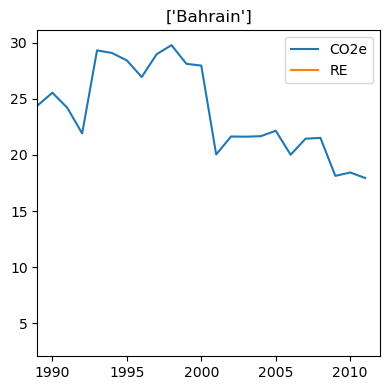

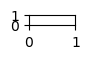

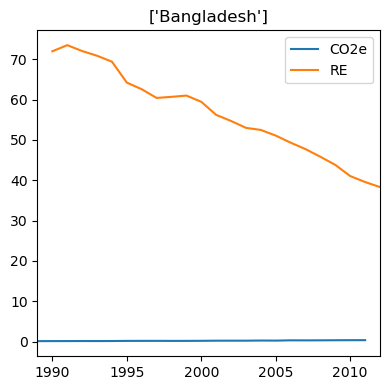

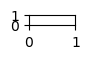

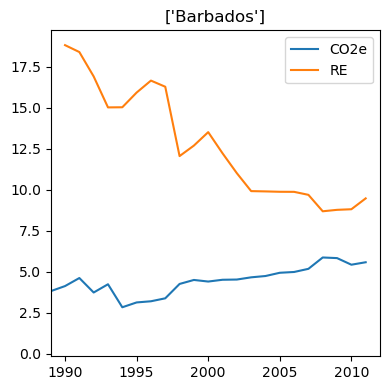

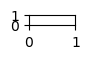

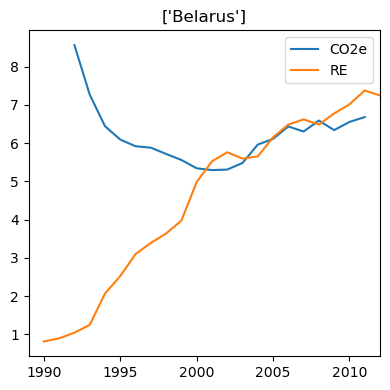

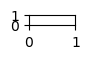

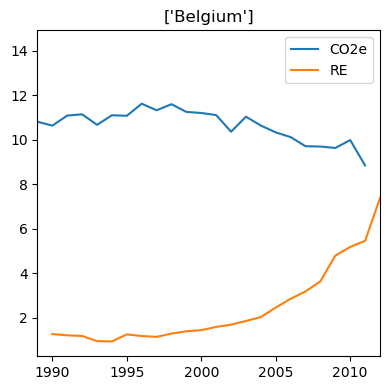

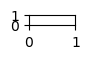

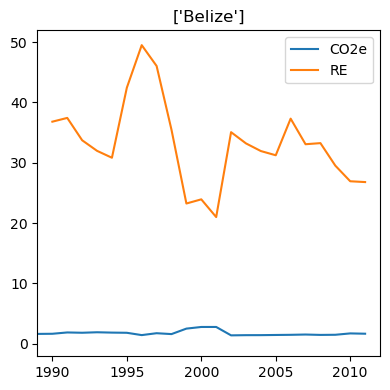

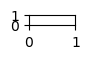

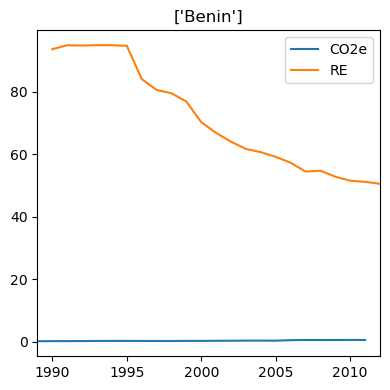

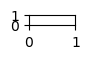

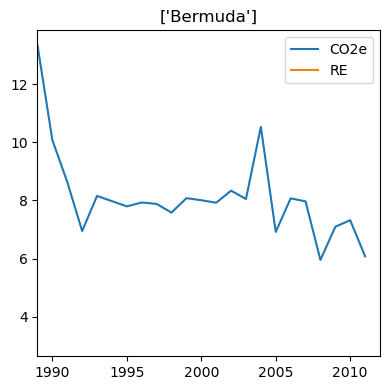

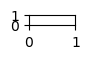

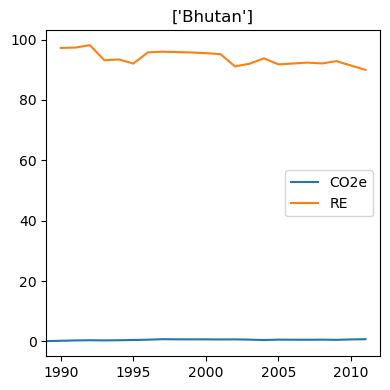

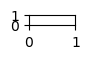

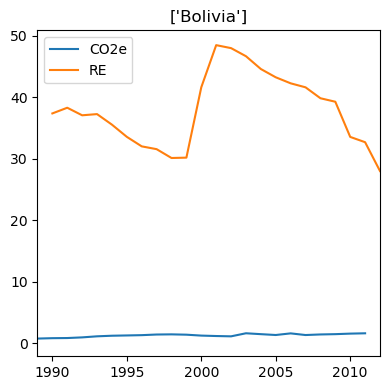

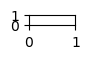

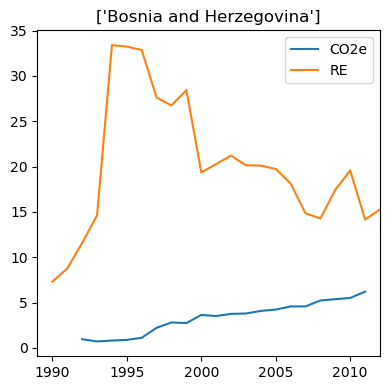

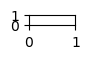

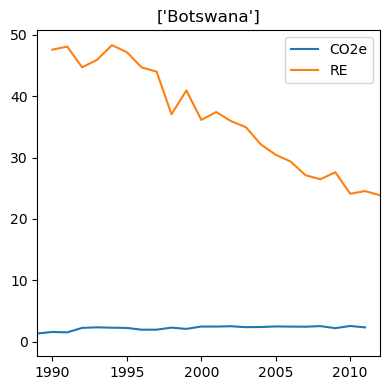

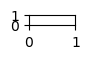

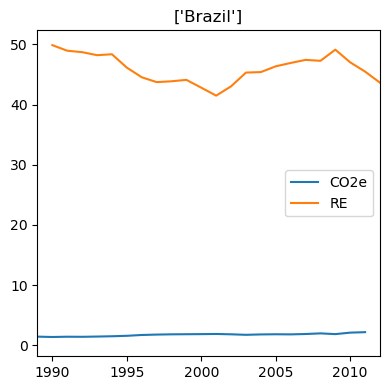

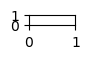

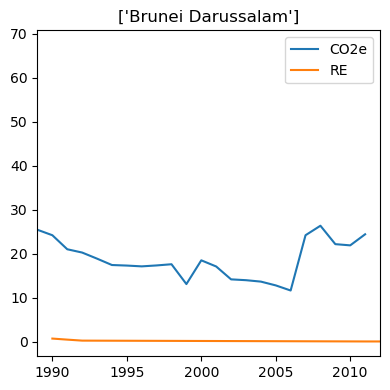

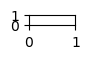

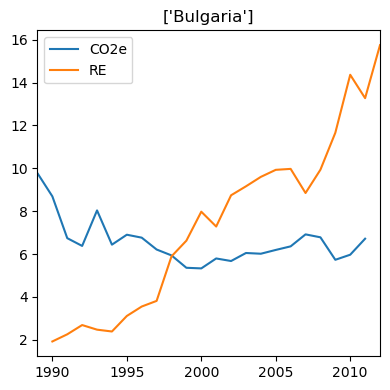

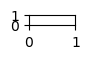

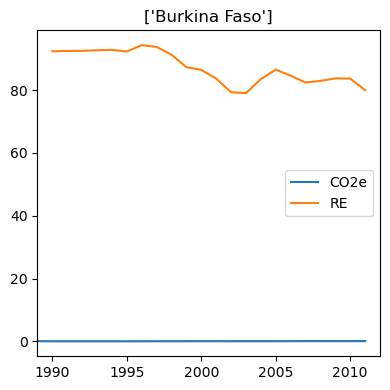

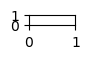

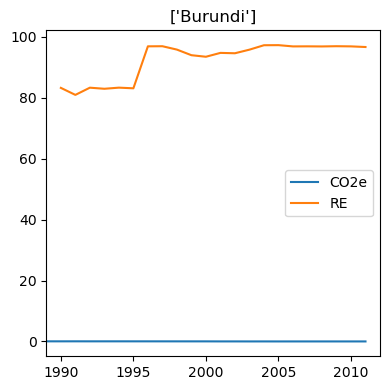

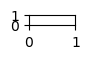

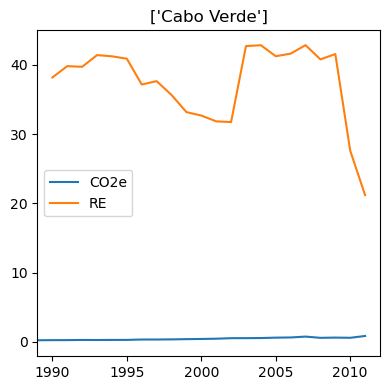

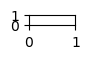

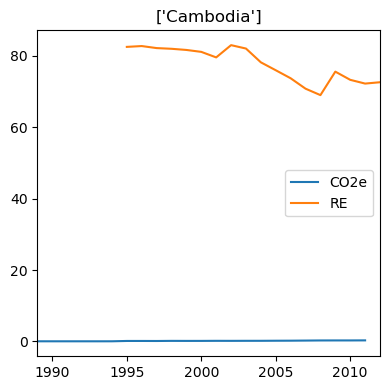

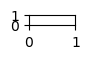

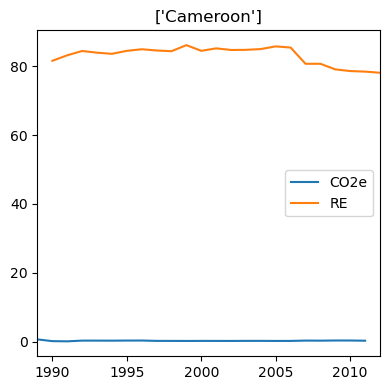

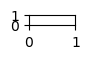

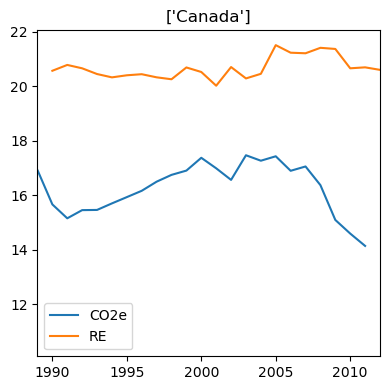

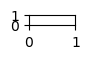

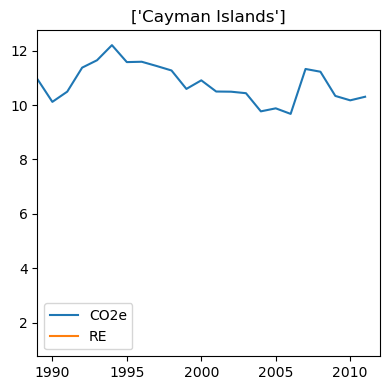

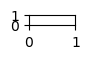

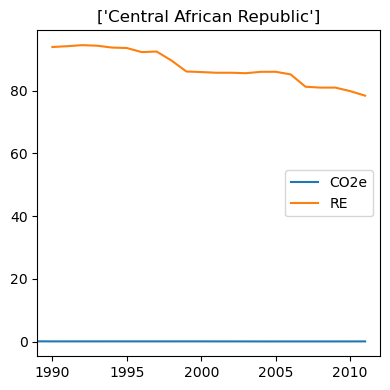

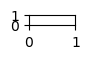

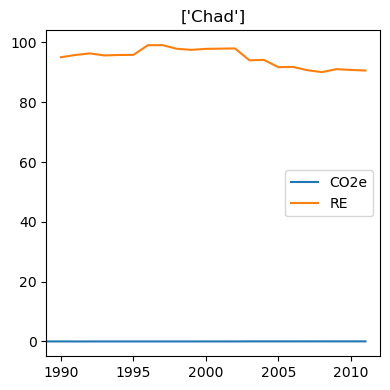

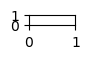

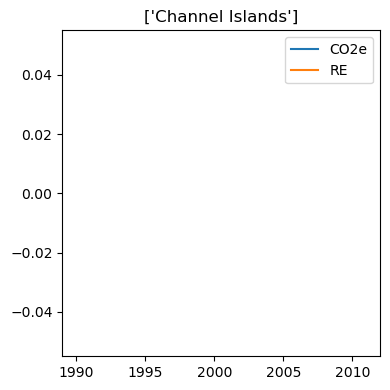

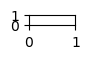

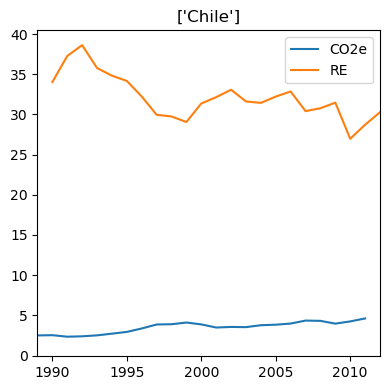

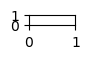

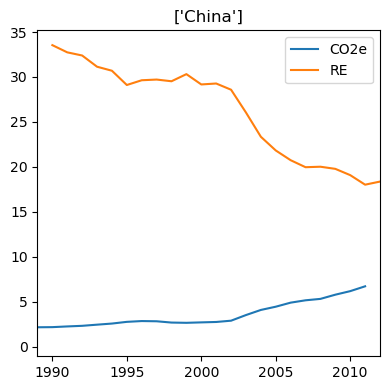

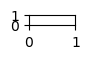

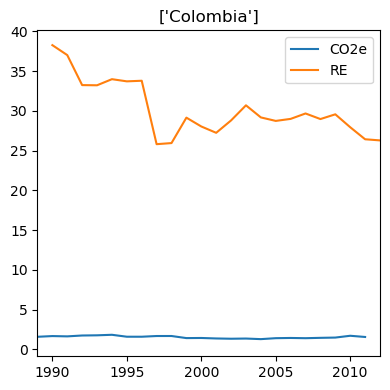

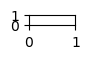

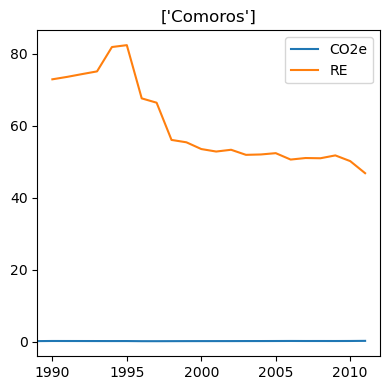

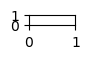

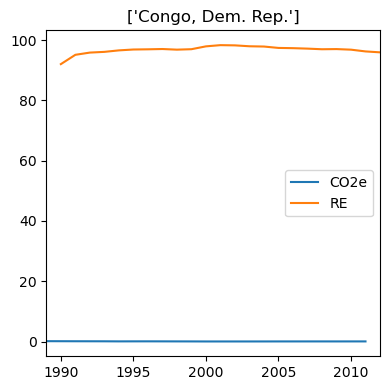

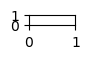

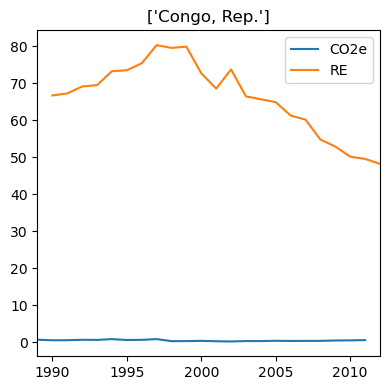

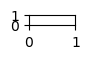

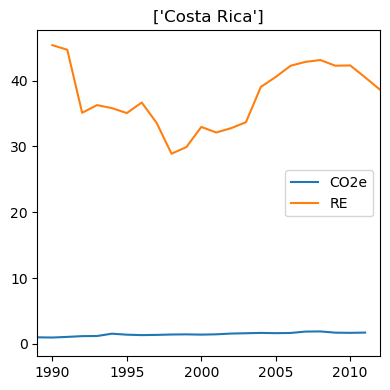

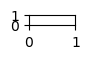

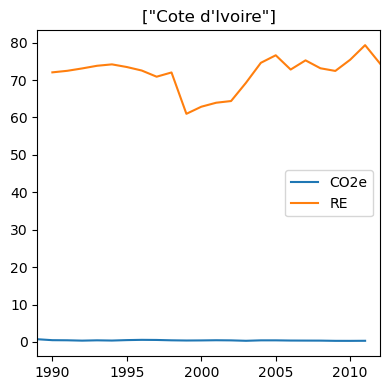

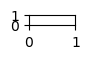

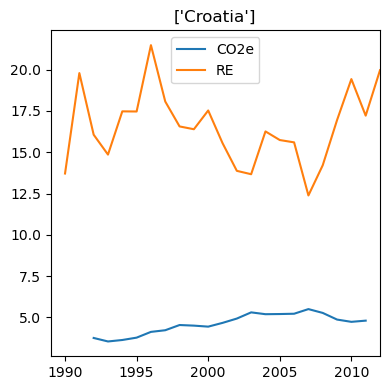

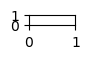

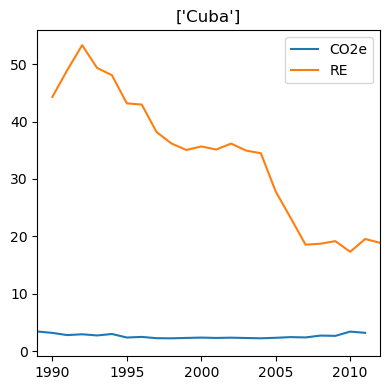

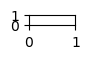

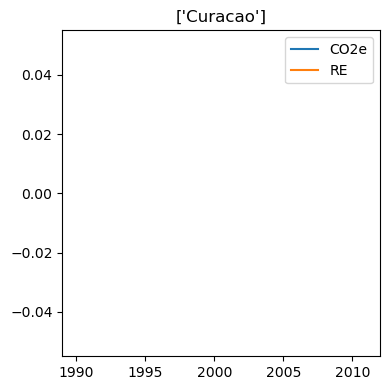

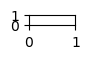

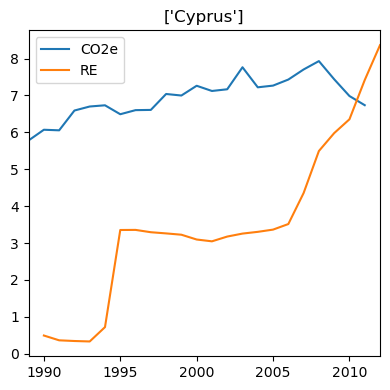

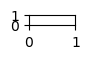

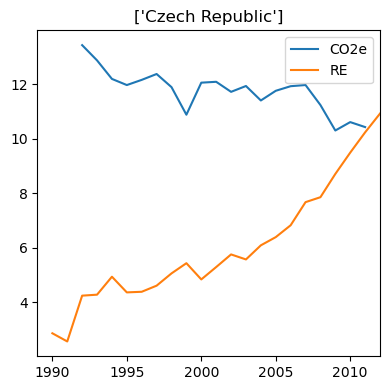

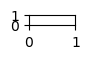

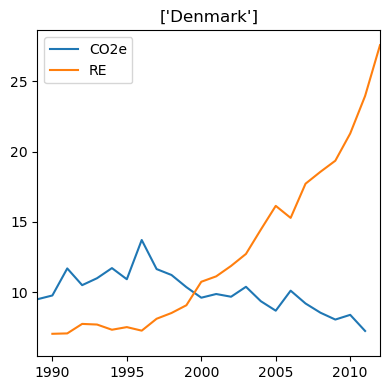

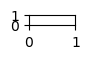

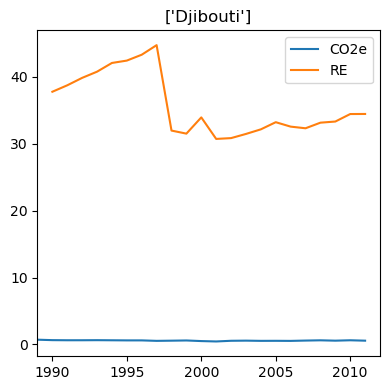

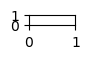

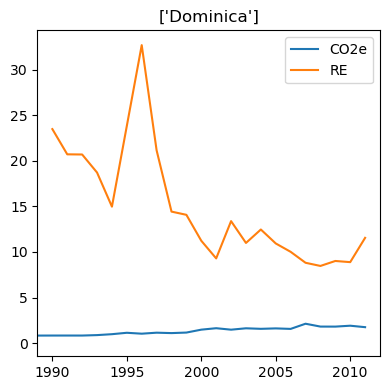

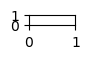

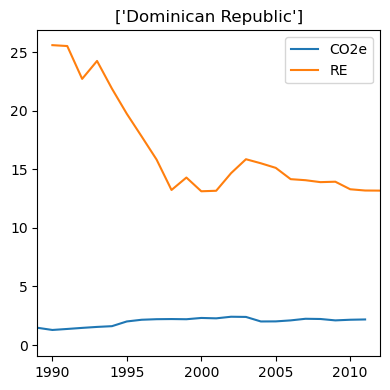

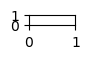

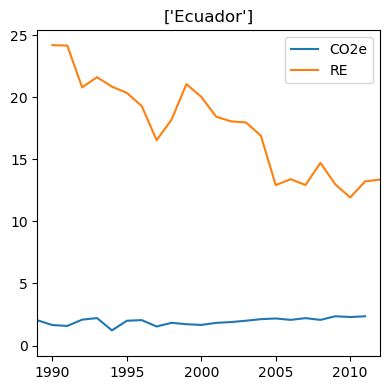

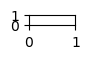

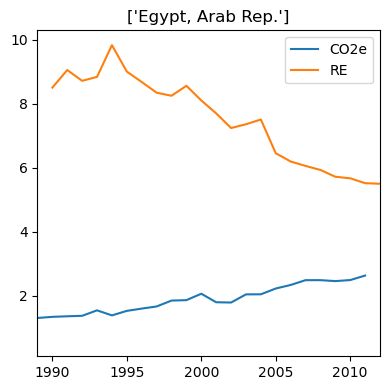

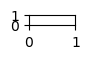

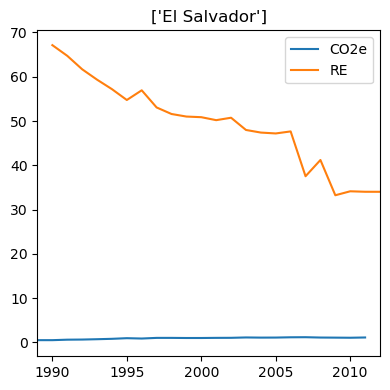

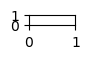

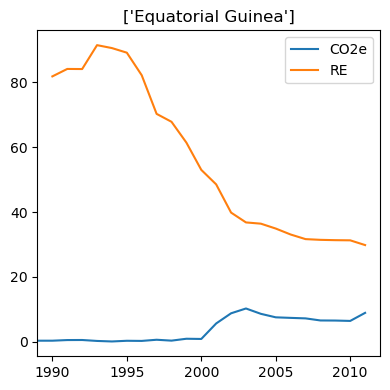

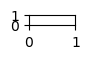

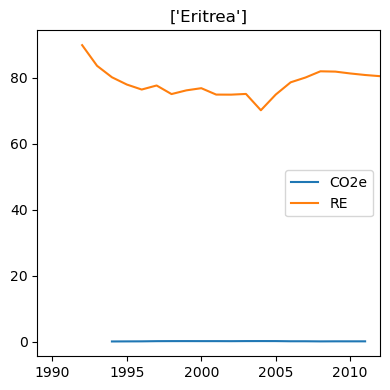

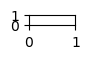

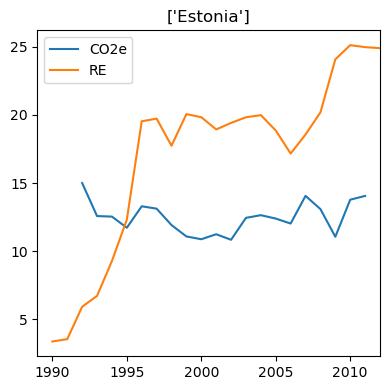

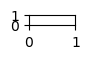

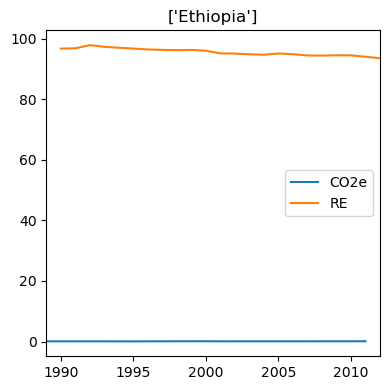

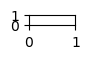

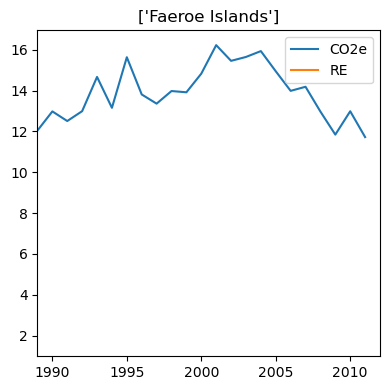

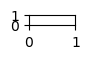

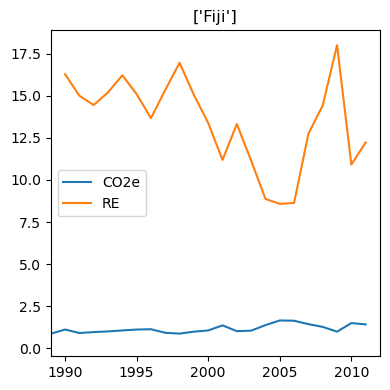

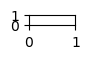

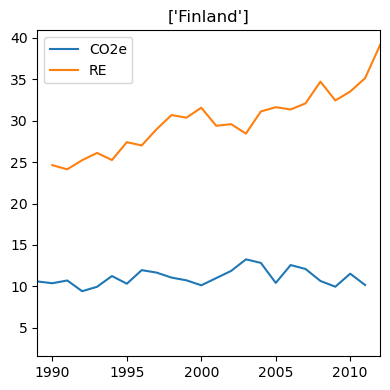

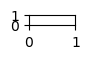

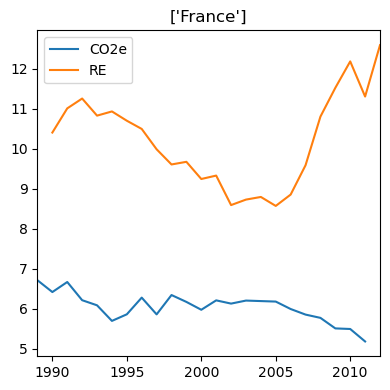

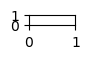

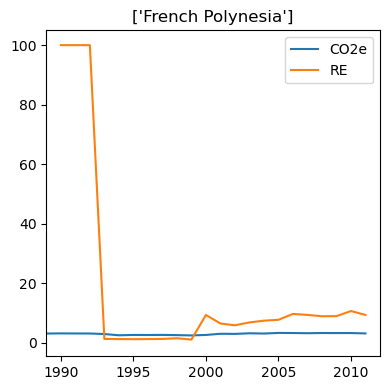

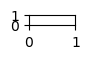

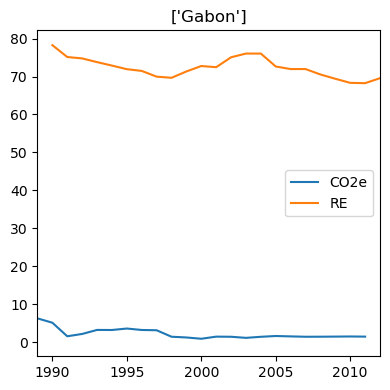

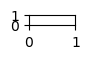

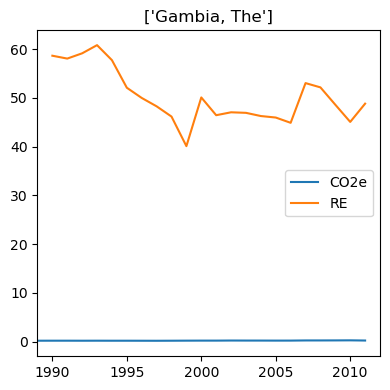

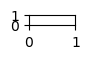

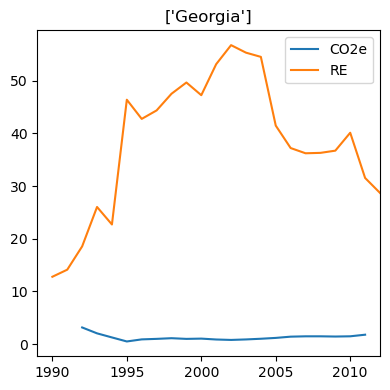

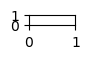

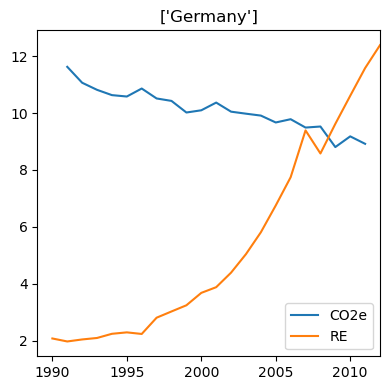

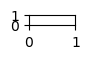

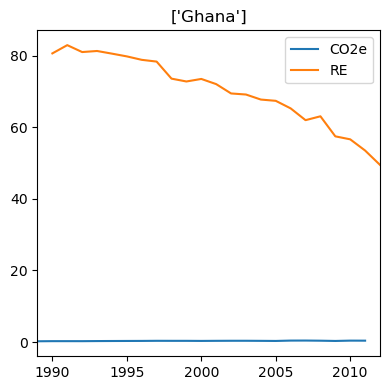

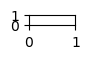

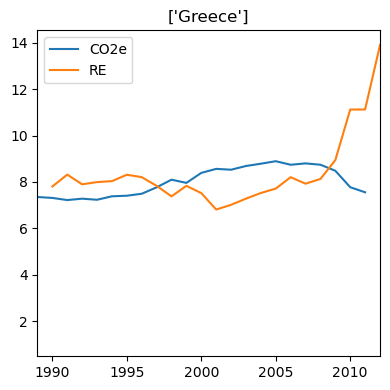

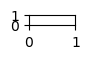

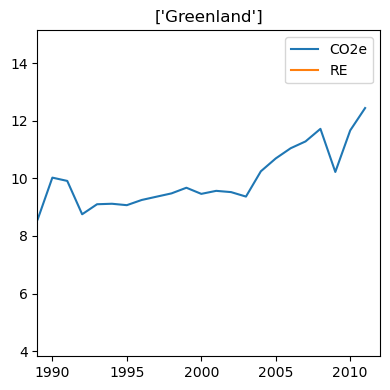

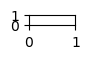

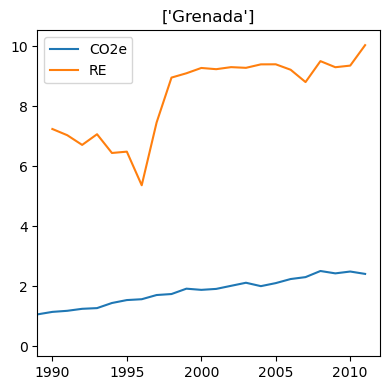

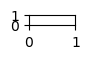

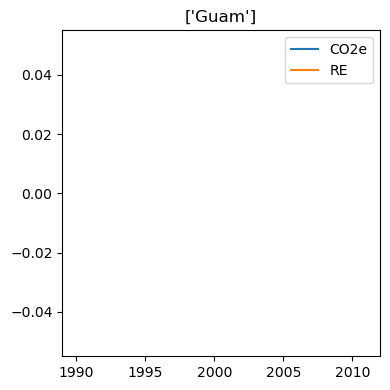

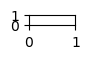

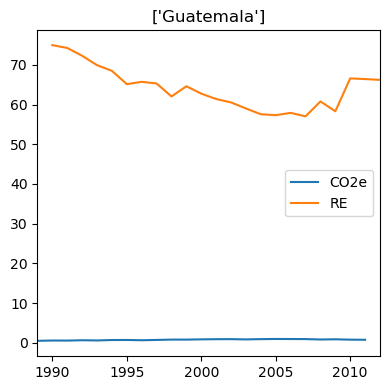

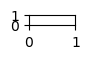

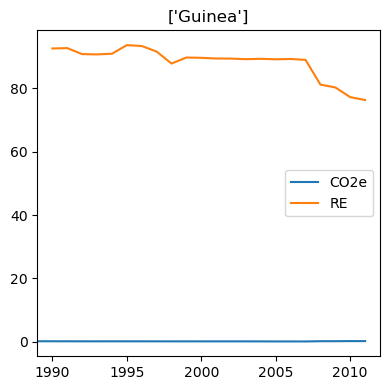

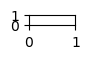

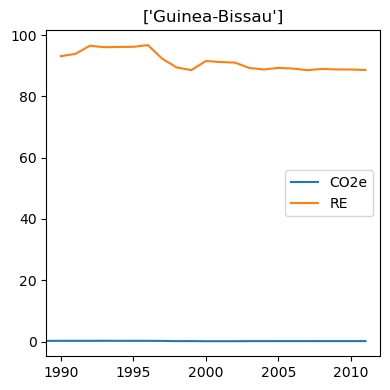

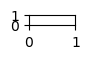

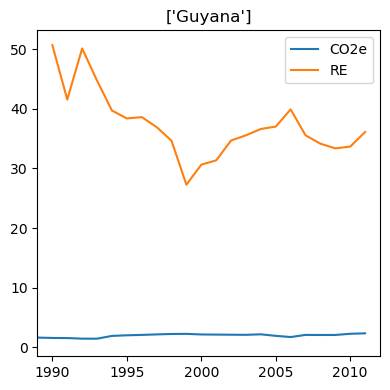

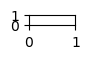

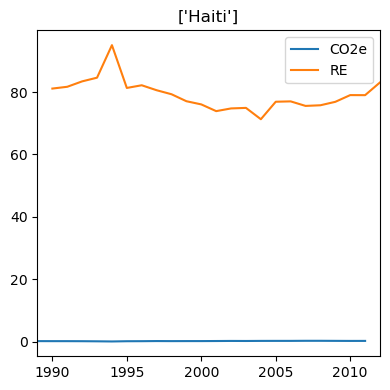

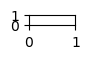

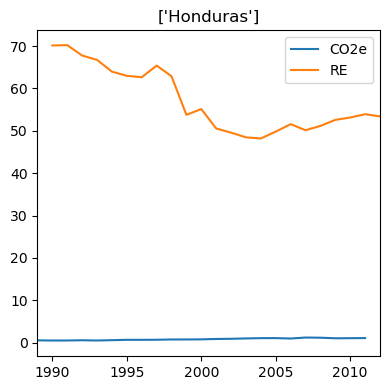

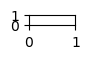

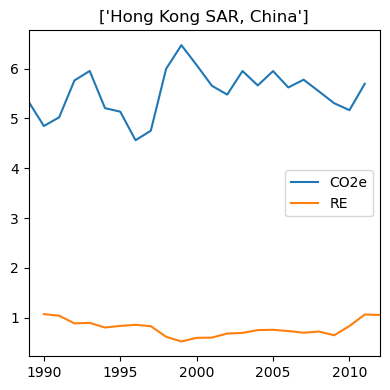

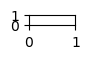

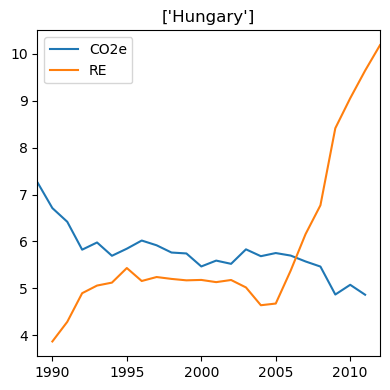

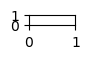

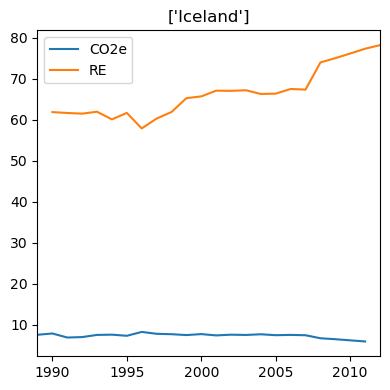

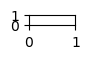

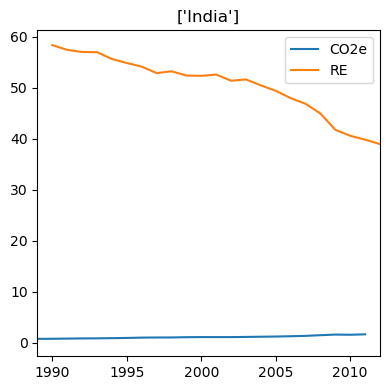

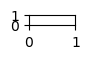

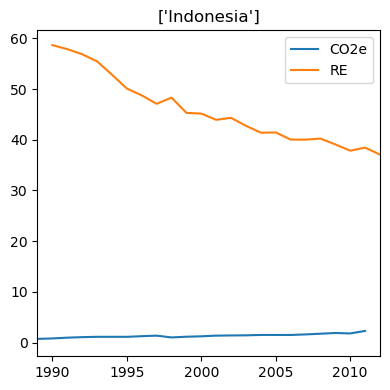

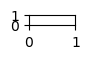

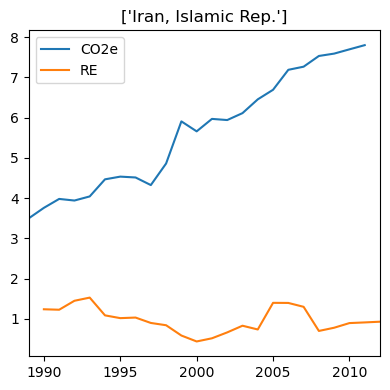

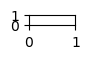

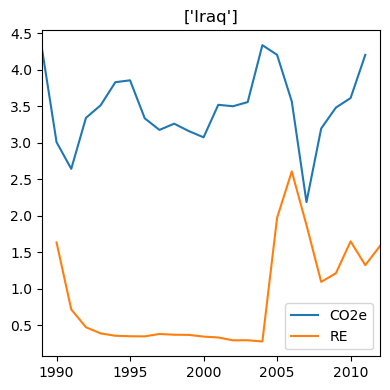

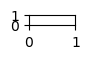

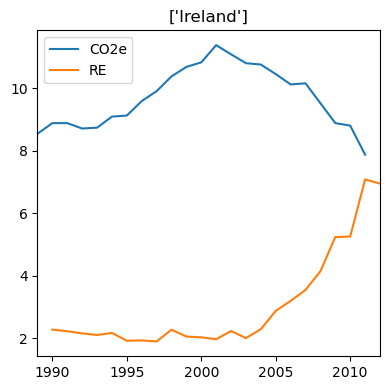

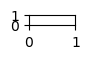

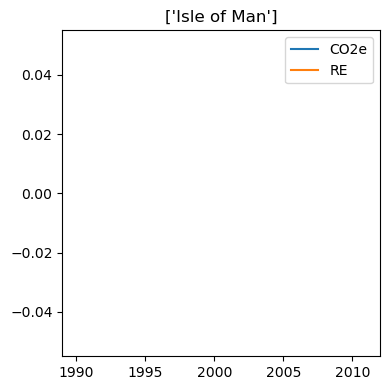

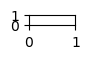

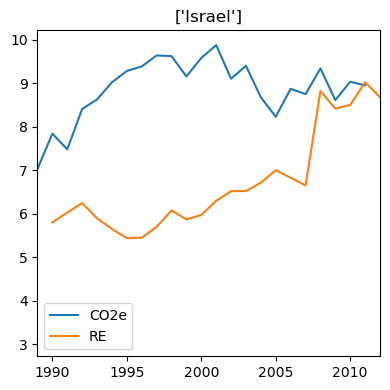

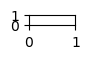

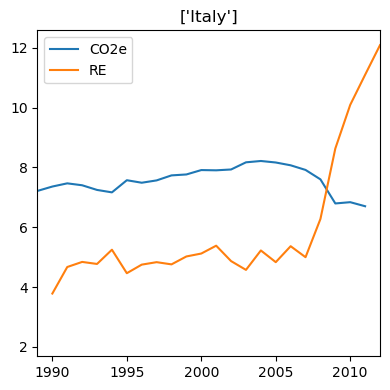

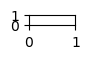

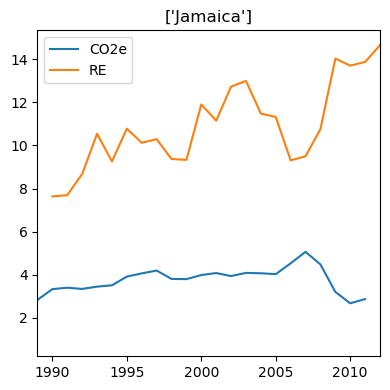

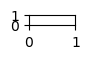

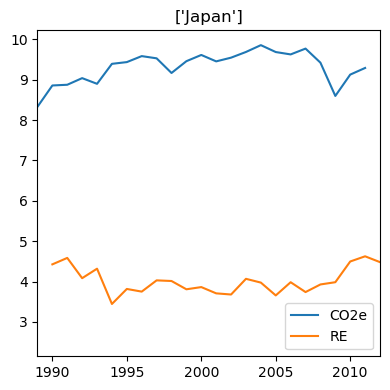

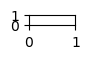

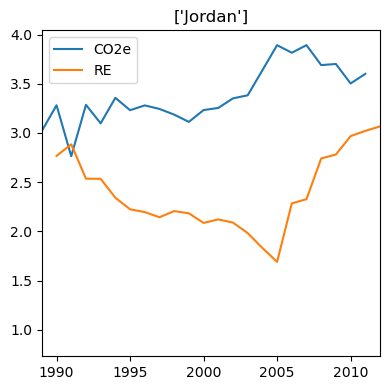

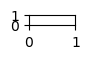

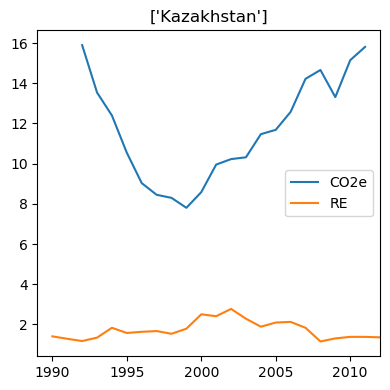

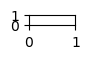

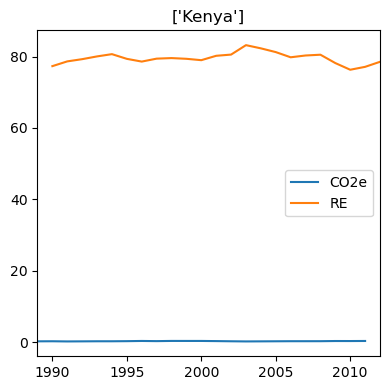

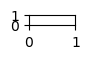

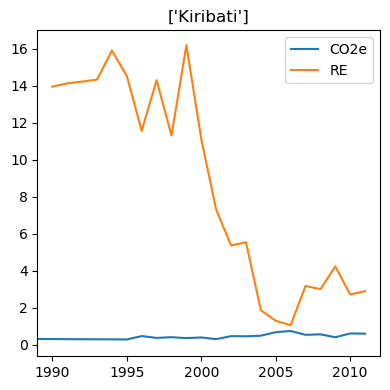

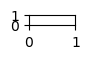

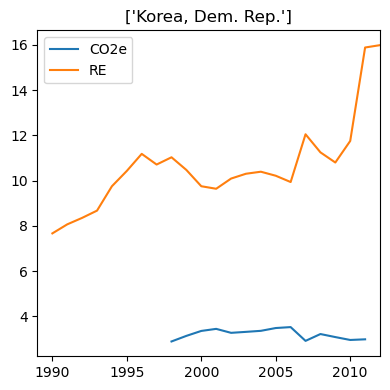

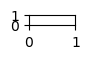

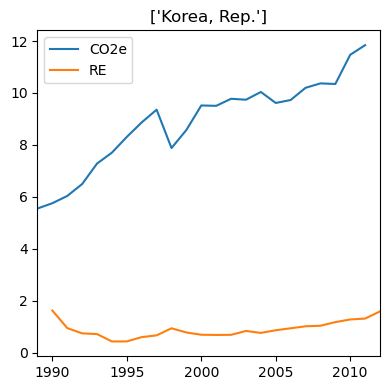

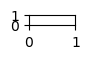

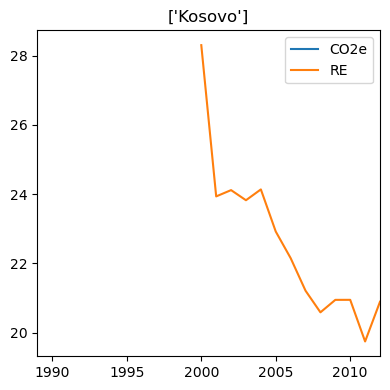

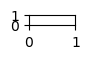

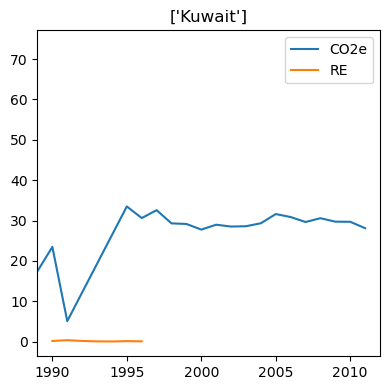

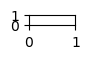

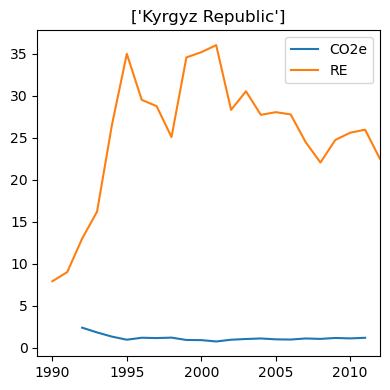

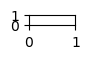

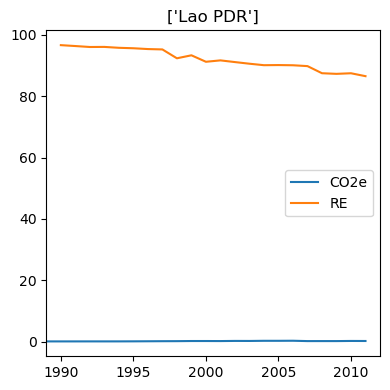

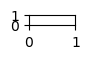

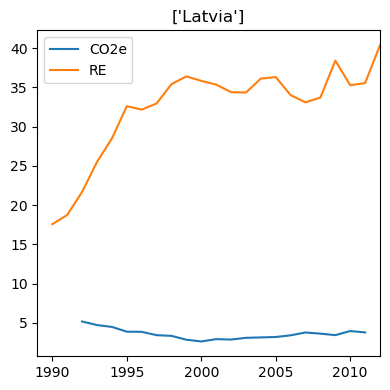

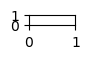

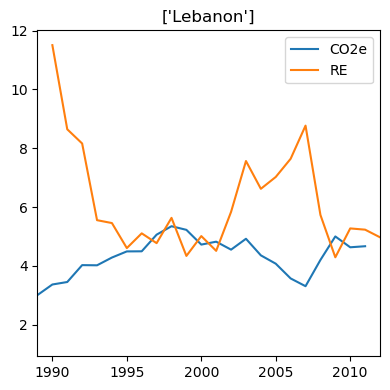

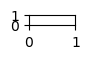

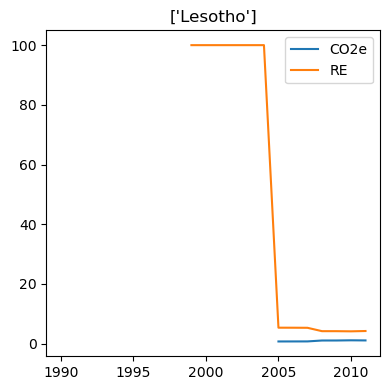

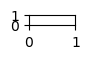

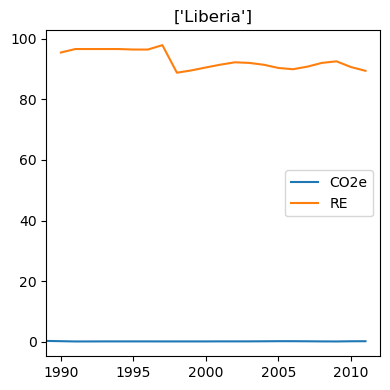

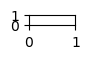

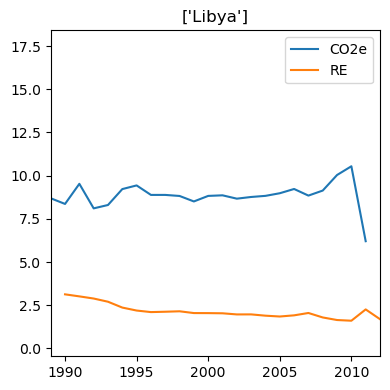

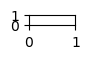

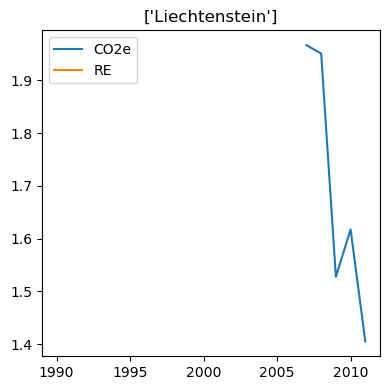

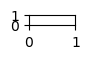

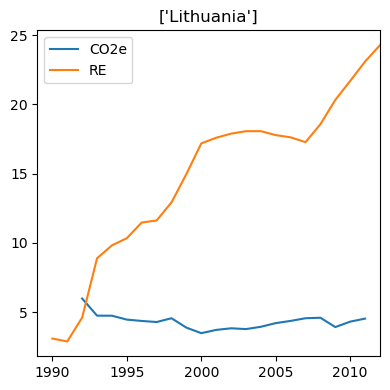

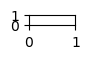

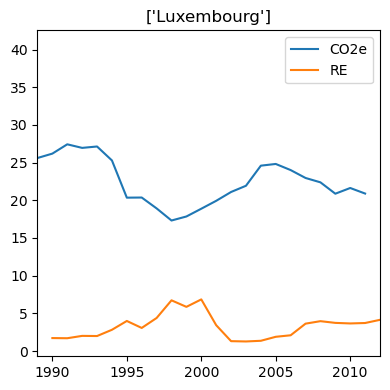

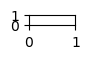

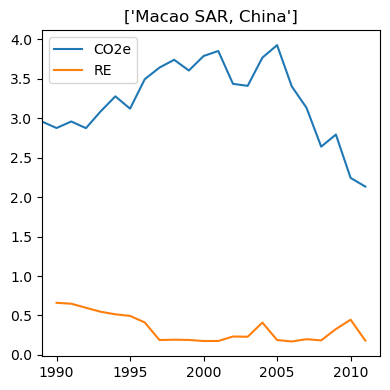

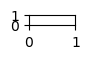

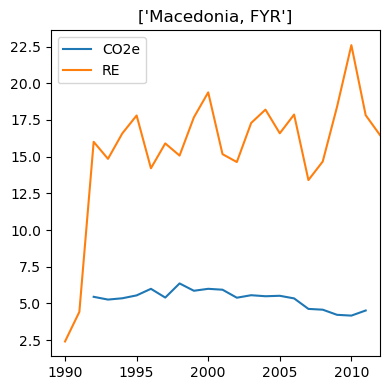

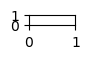

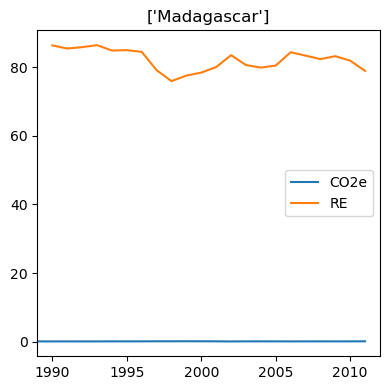

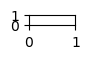

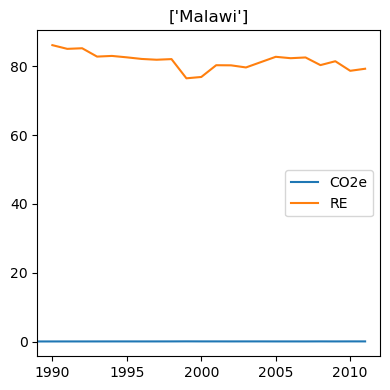

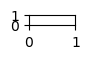

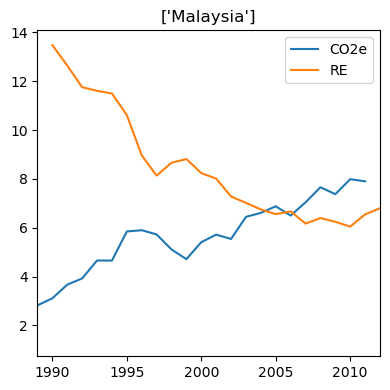

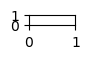

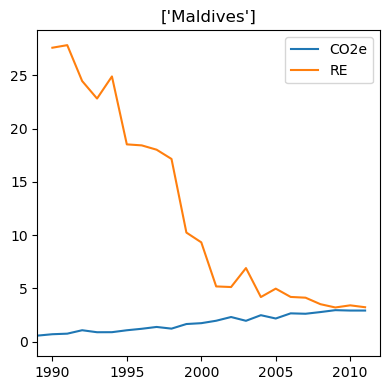

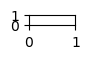

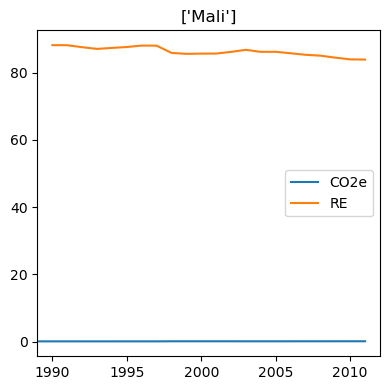

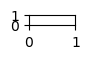

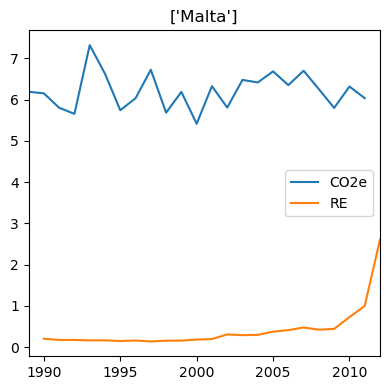

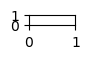

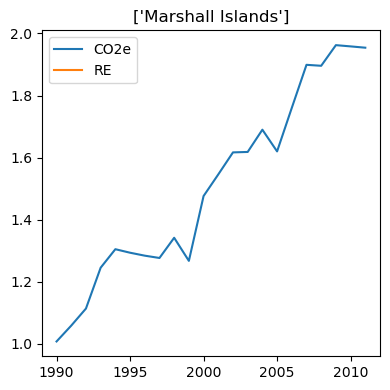

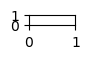

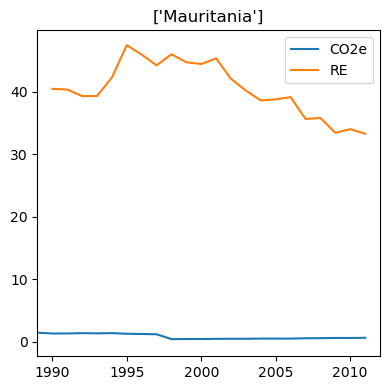

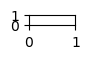

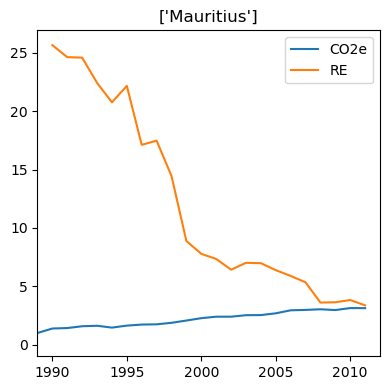

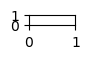

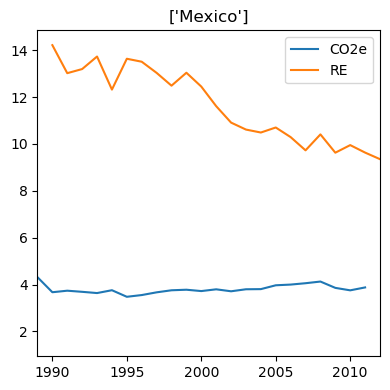

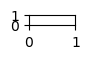

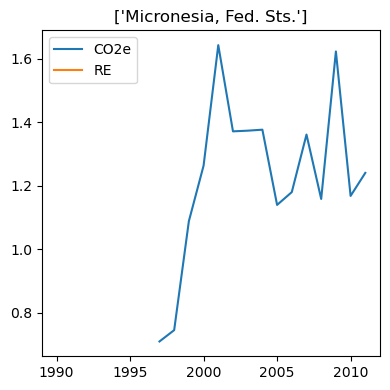

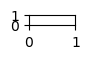

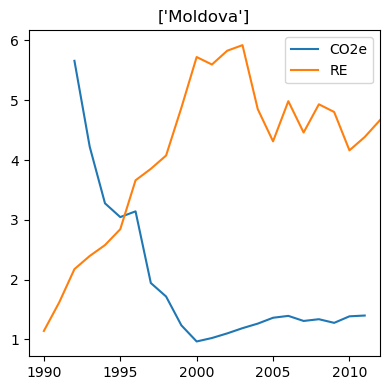

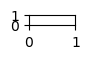

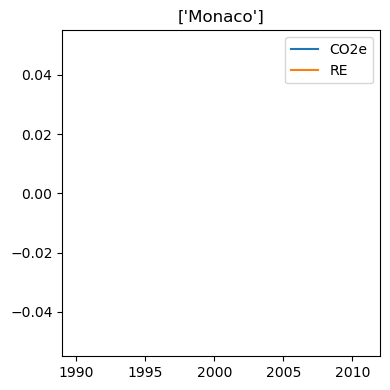

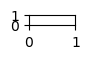

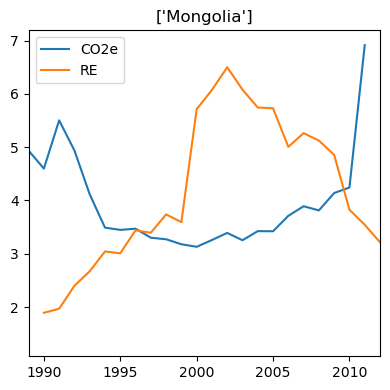

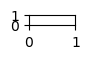

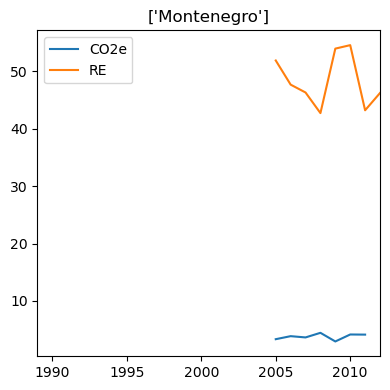

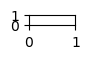

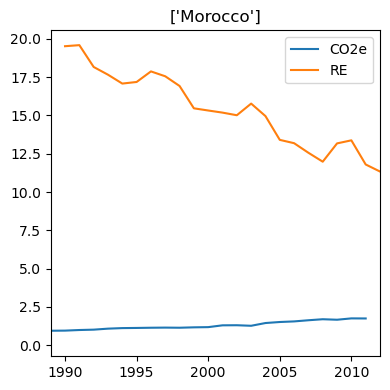

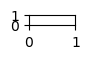

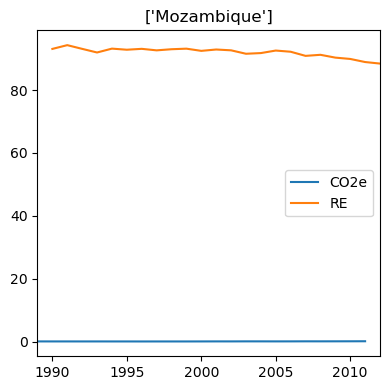

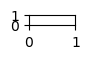

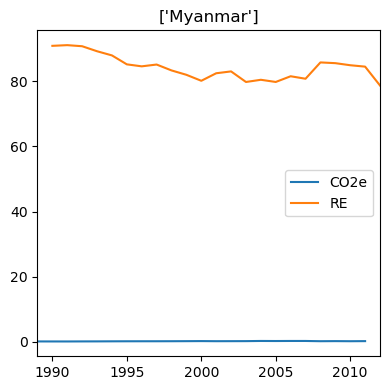

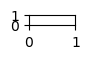

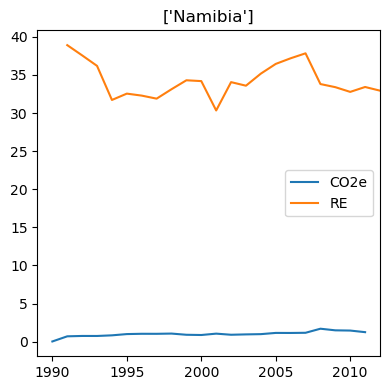

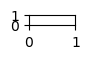

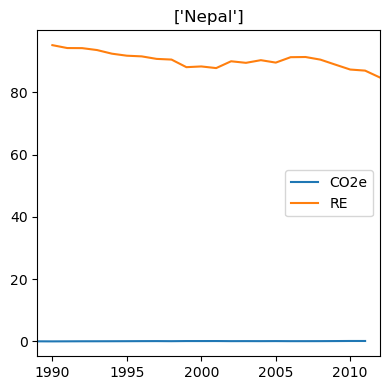

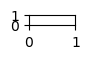

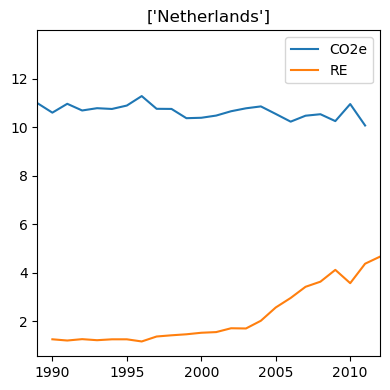

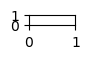

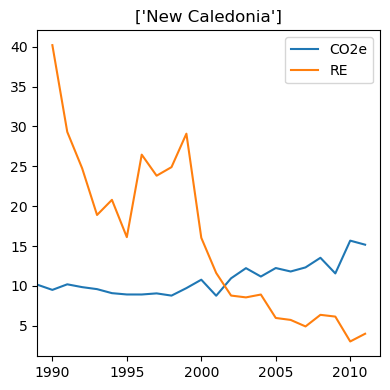

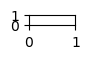

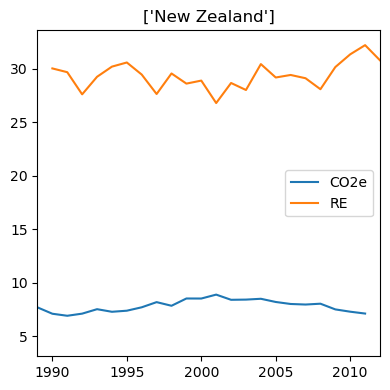

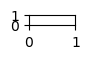

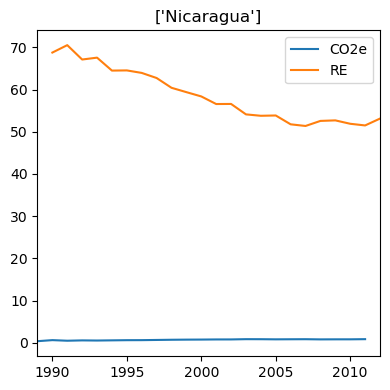

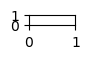

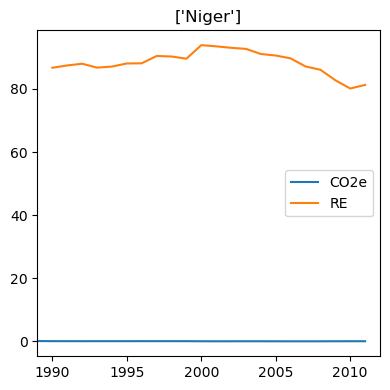

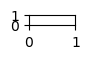

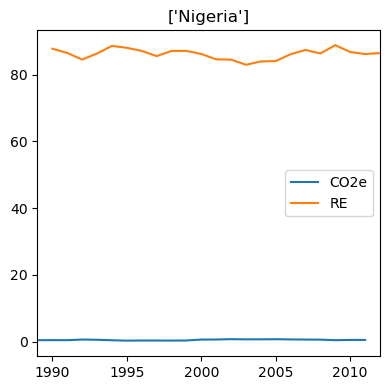

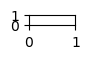

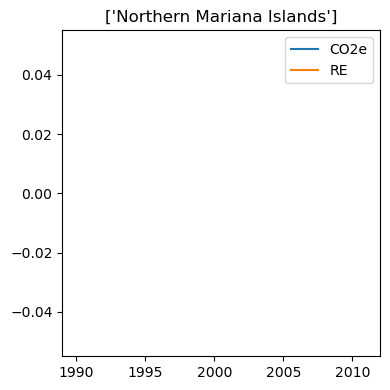

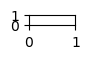

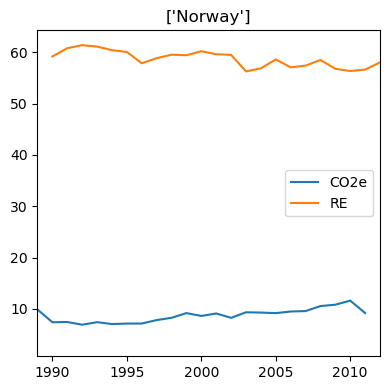

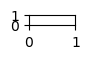

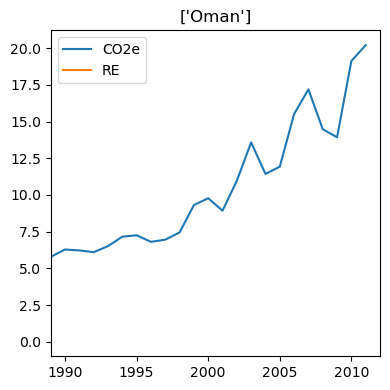

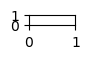

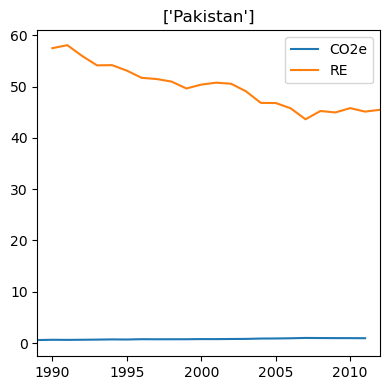

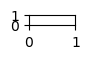

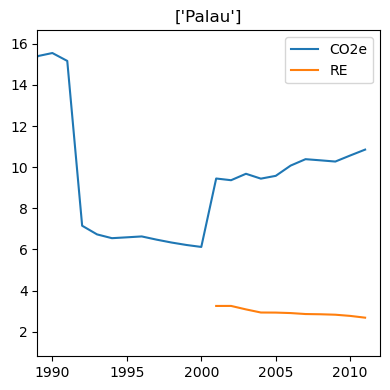

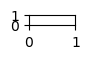

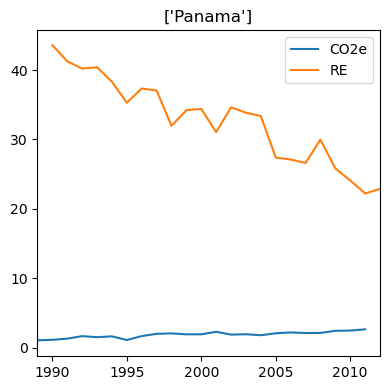

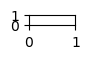

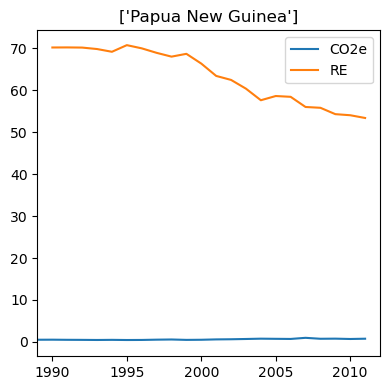

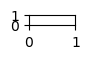

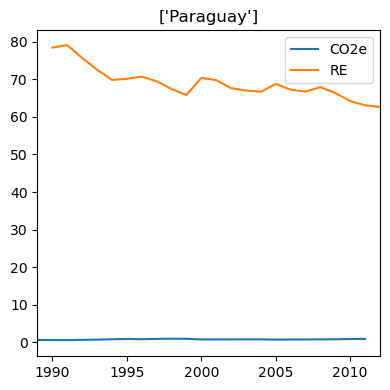

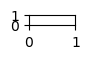

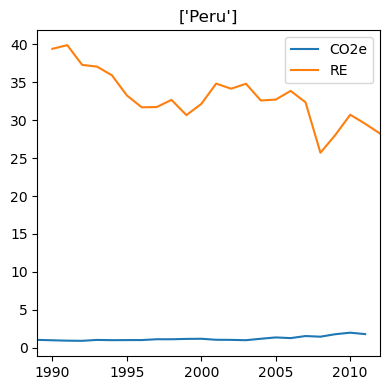

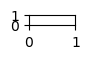

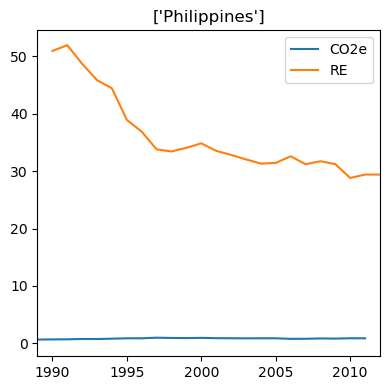

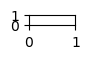

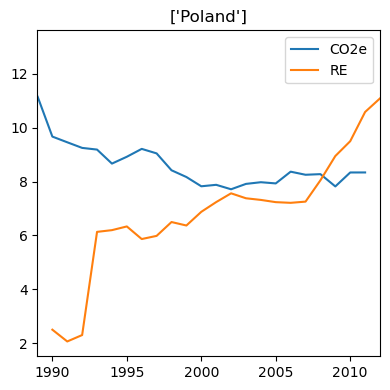

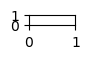

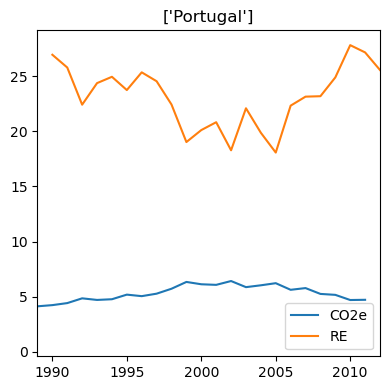

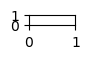

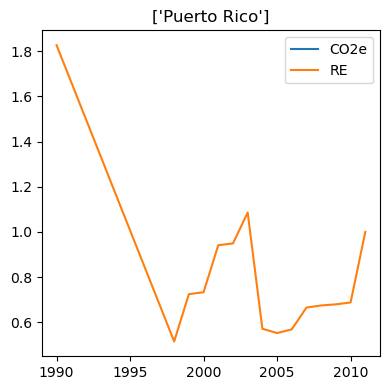

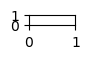

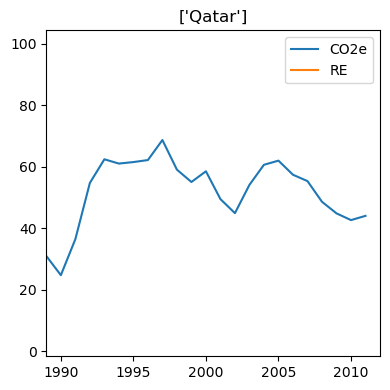

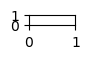

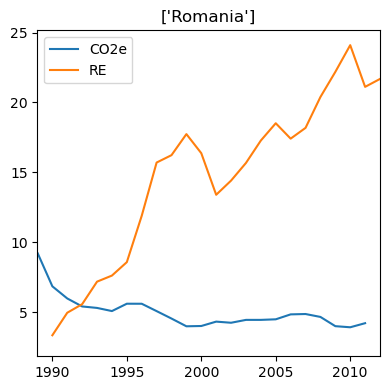

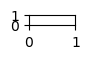

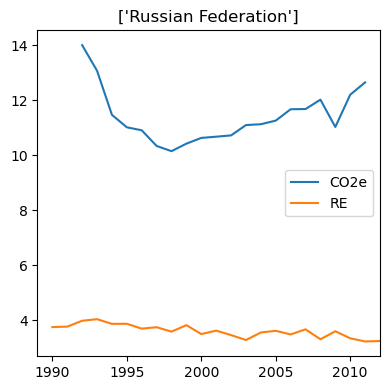

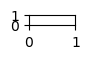

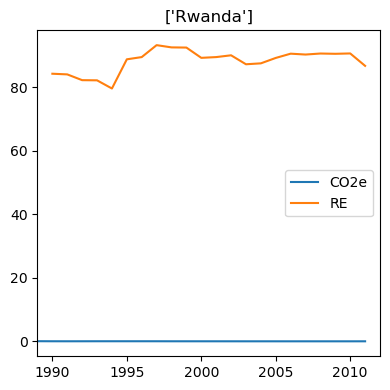

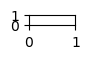

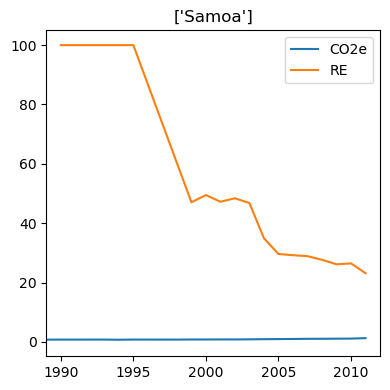

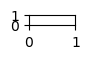

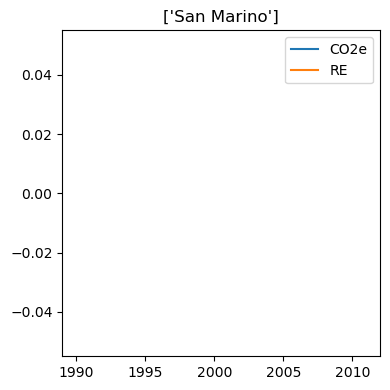

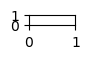

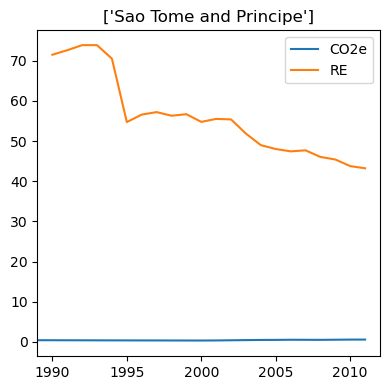

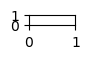

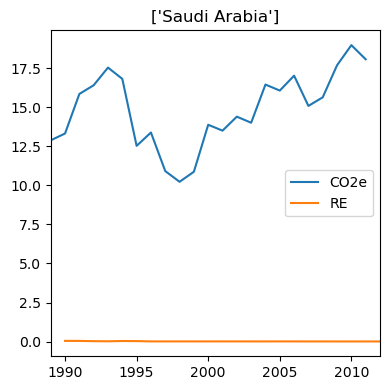

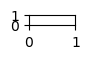

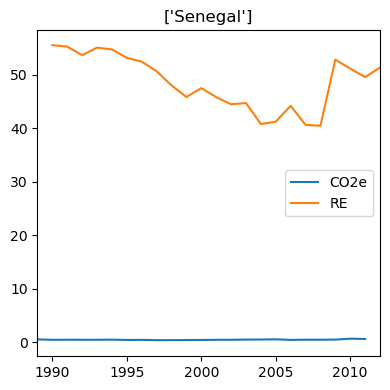

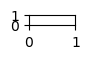

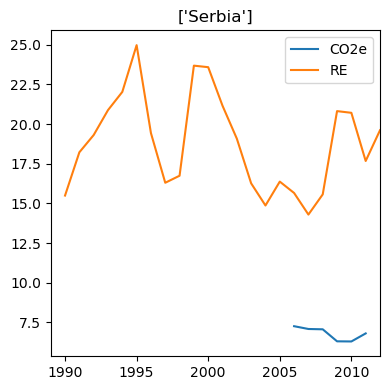

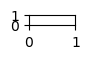

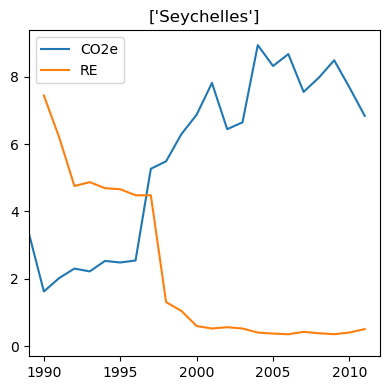

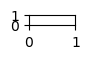

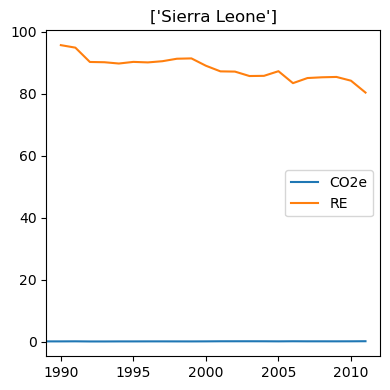

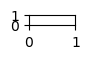

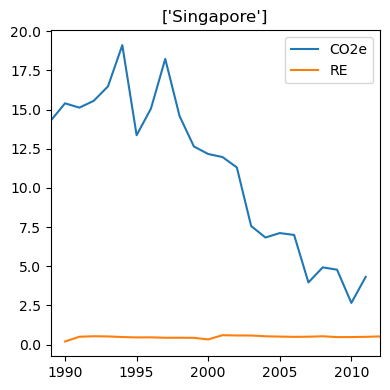

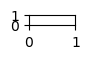

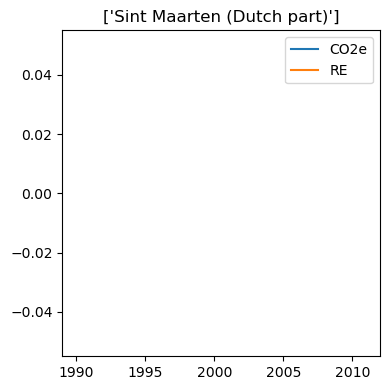

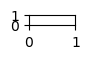

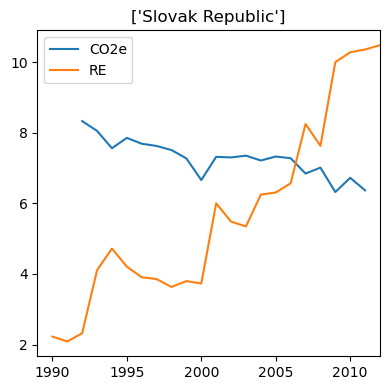

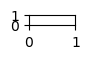

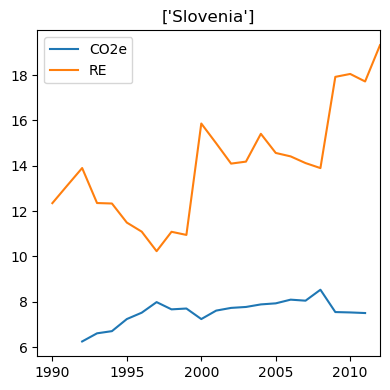

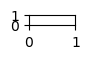

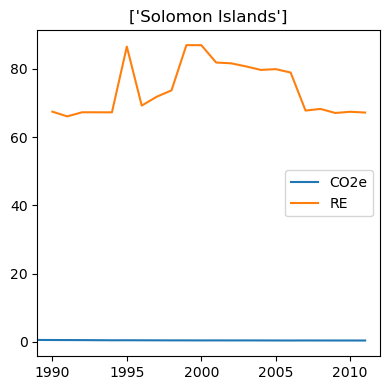

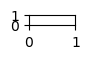

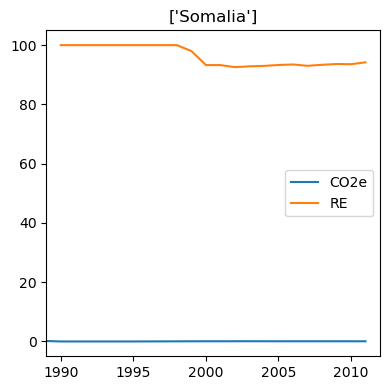

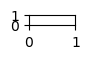

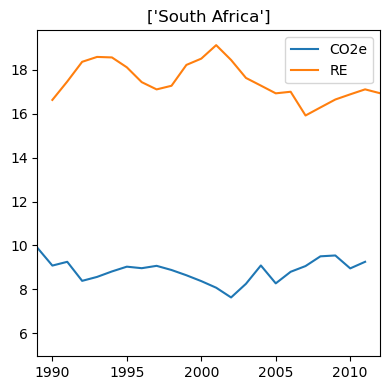

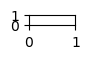

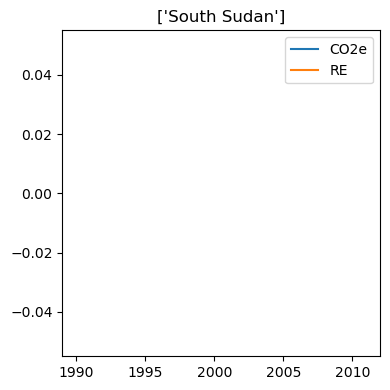

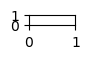

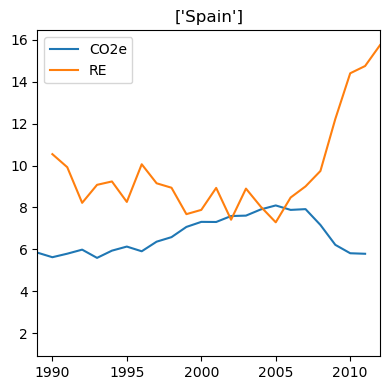

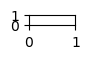

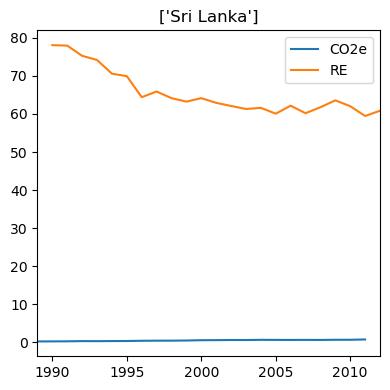

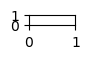

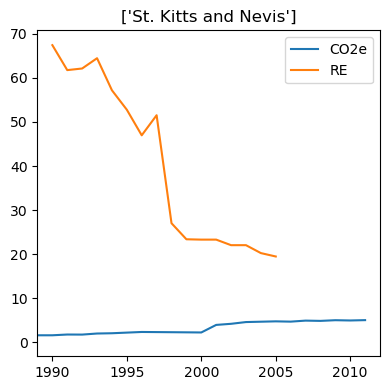

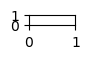

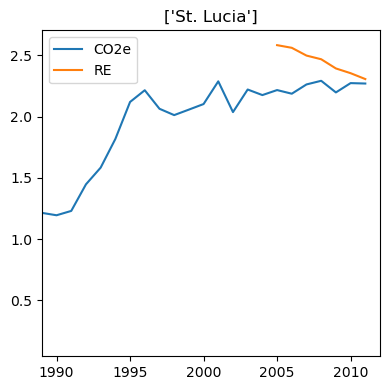

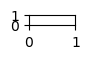

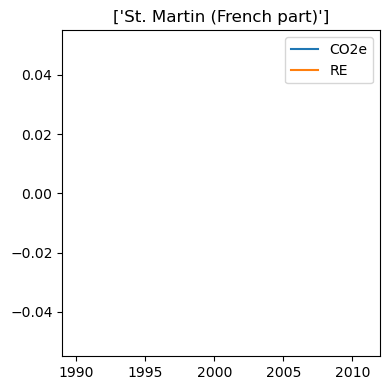

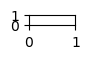

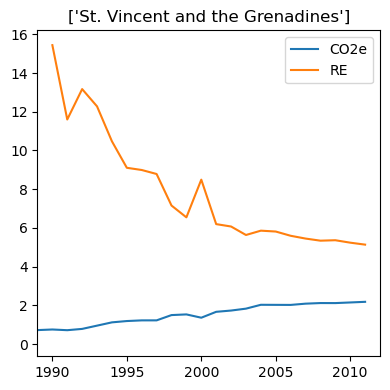

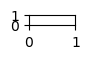

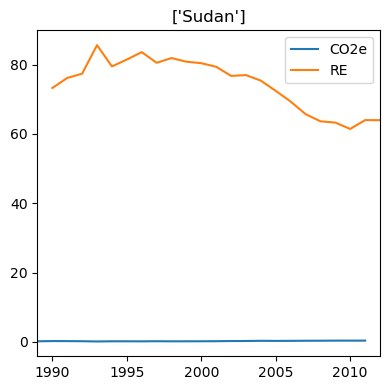

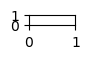

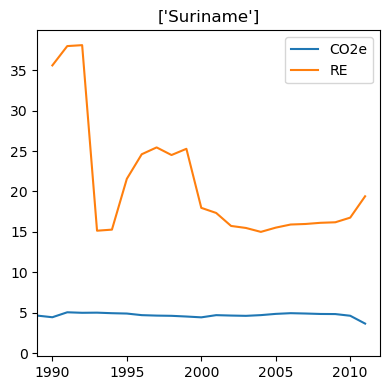

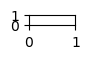

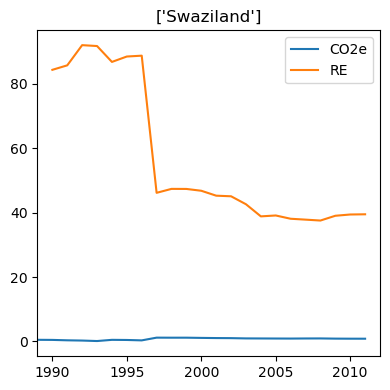

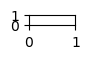

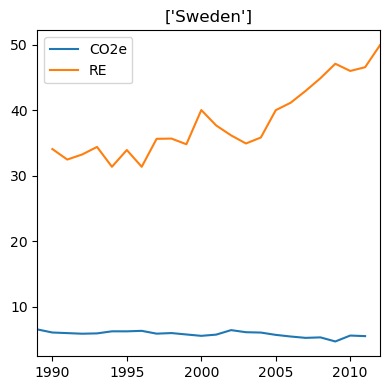

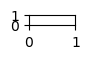

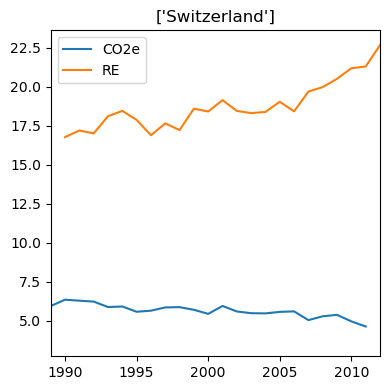

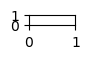

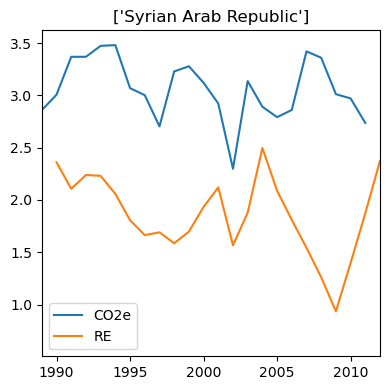

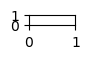

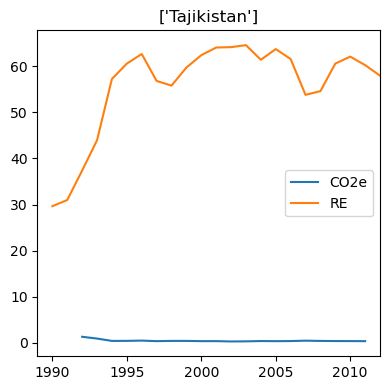

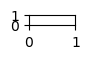

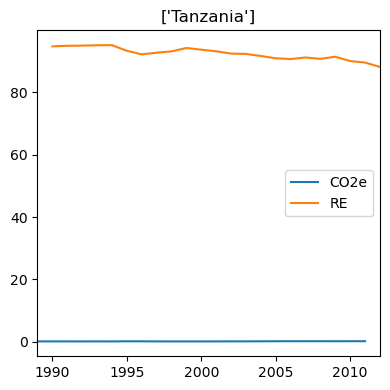

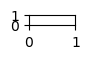

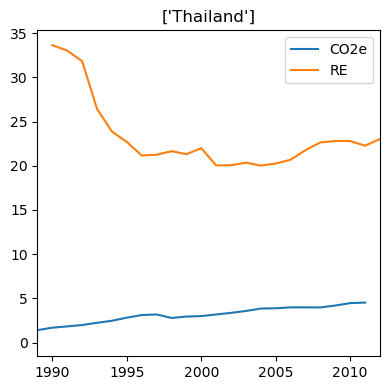

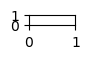

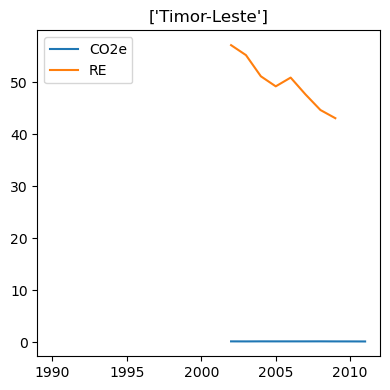

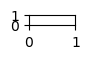

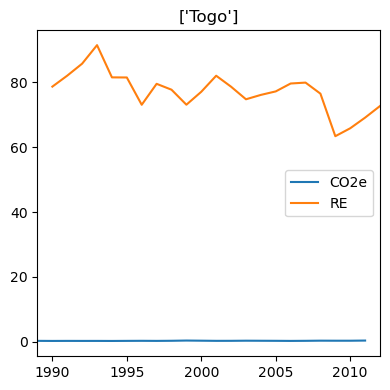

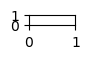

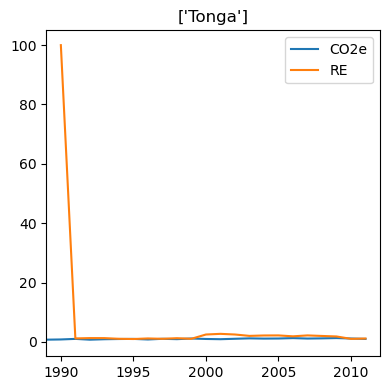

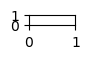

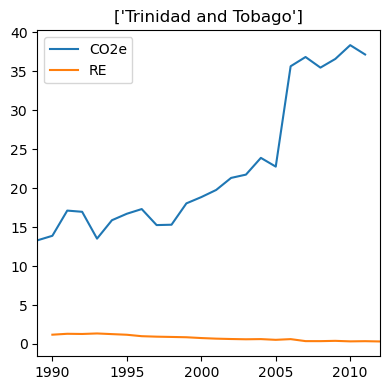

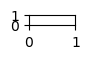

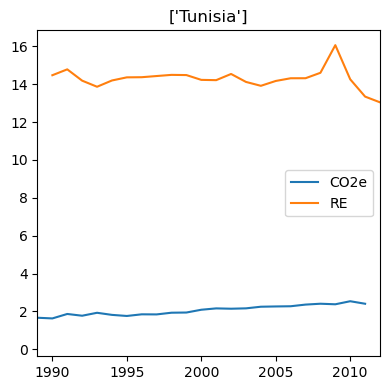

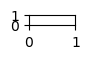

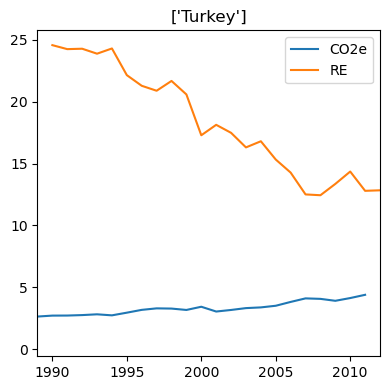

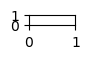

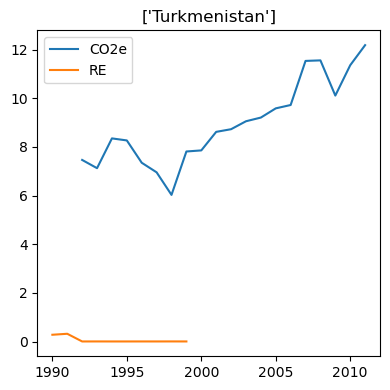

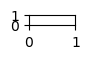

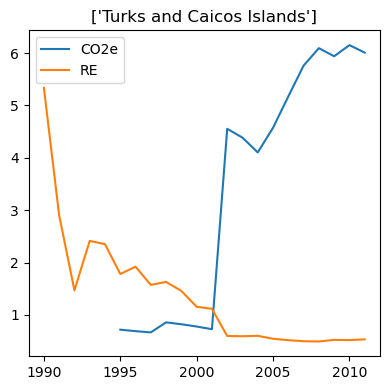

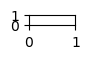

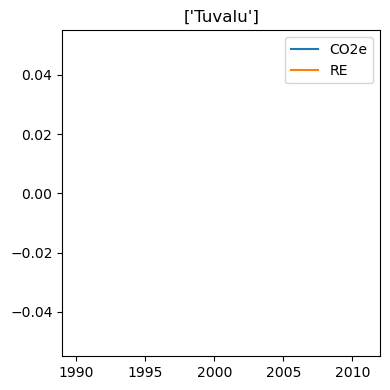

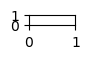

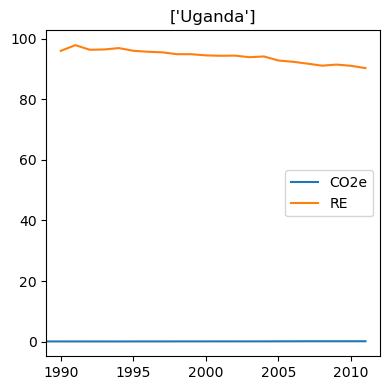

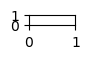

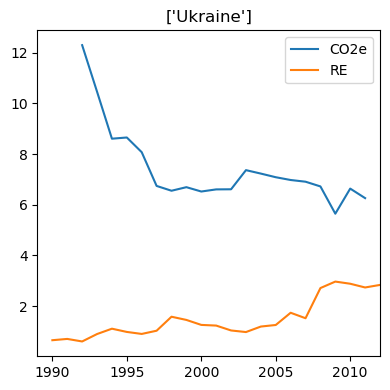

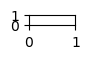

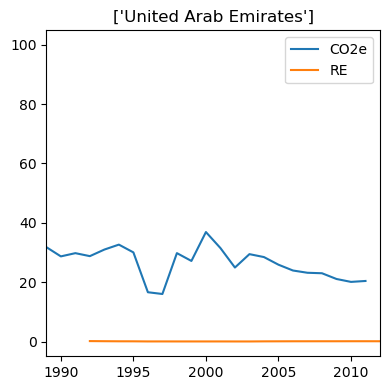

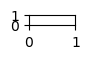

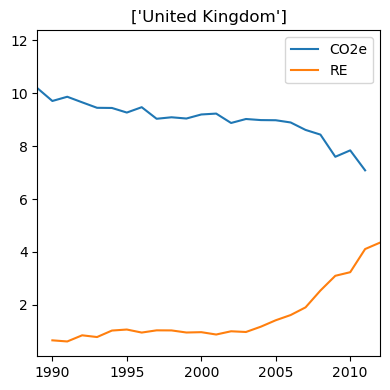

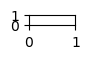

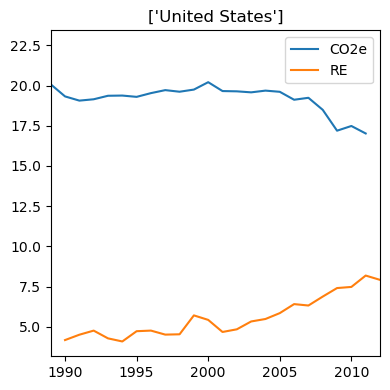

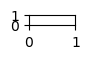

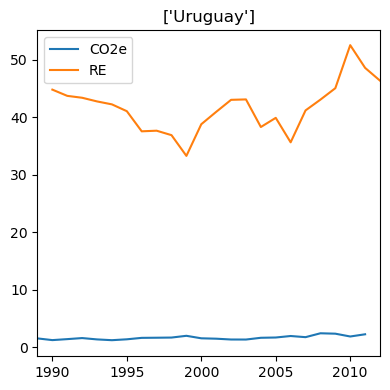

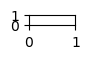

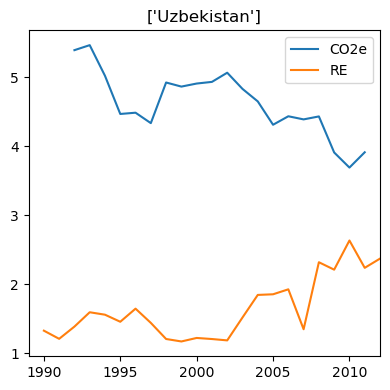

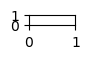

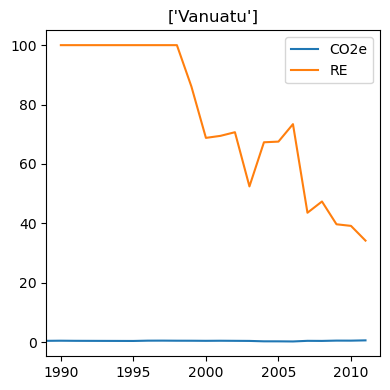

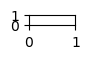

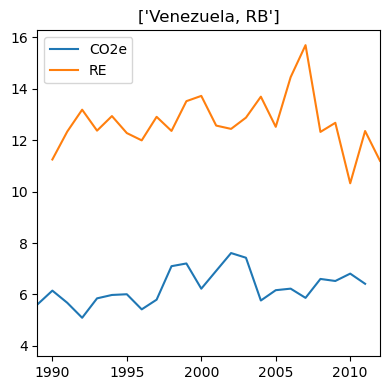

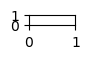

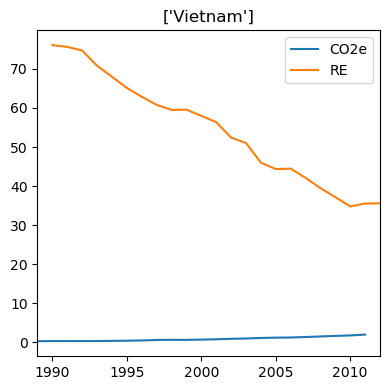

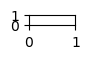

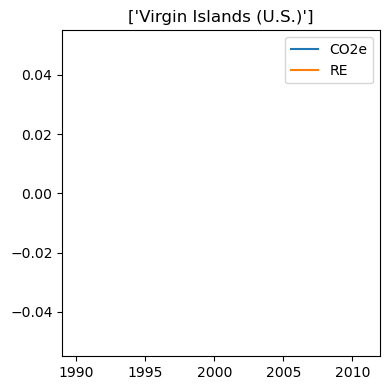

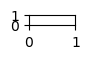

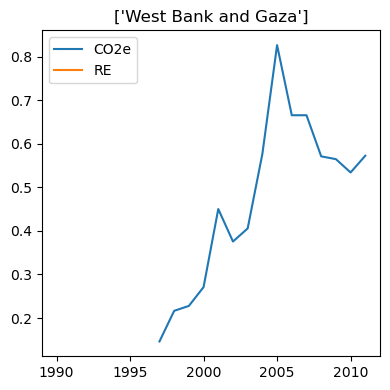

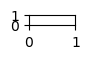

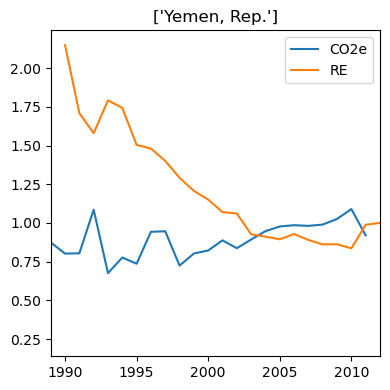

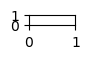

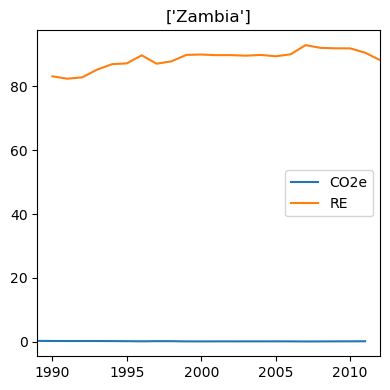

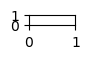

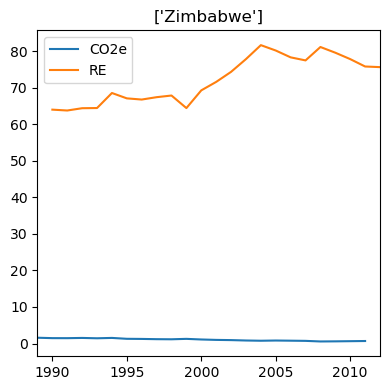

In [12]:
d_CO2e = {}
d_RE = {}

Perc_RE = 'Renewable energy consumption \(% of'
Perc_CO2e = 'CO2 emissions \(metric'

for j,k in zip(CC, range(len(CC))):
    d_RE["mask1{0}".format(j)] = d["{0}".format(j)]['IndicatorName'].str.contains(Perc_RE) 
    d_CO2e["mask2{0}".format(j)] = d["{0}".format(j)]['IndicatorName'].str.contains(Perc_CO2e) 
   
    plt.subplot(30, 9, k+1)
    plt.figure(figsize=(4,4))
    plt.plot(d["{0}".format(j)][d_CO2e["mask2{0}".format(j)]]['Value'], label = 'CO2e', scalex=(1990, 2012) )
    plt.plot(d["{0}".format(j)][d_RE["mask1{0}".format(j)]]['Value'], label = 'RE', scalex=(1990, 2012) )
    plt.xlim(1989,2012)
    plt.title(d["{0}".format(j)]['CountryName'].unique())
    plt.legend()
    plt.tight_layout()
    plt.show()